# About Dataset
The dataset for this experiment is drawn from the publicly available Kaggle dataset “Precious Metals: Data & News (2000–Present)” (Daily market history (OHLCV) and WSJ news headlines since 2000). The URL is:
https://www.kaggle.com/datasets/romanfonel/precious-metals-history-since-2000-with-news

About the Dataset:
This dataset offers a rich combination of quantitative financial market data and qualitative news text data on a daily basis, specifically focusing on the precious metals market (gold, silver, platinum, and palladium, using Gold Futures “GC=F” as the primary example) from August 2000 up to April 2025. It is designed for researchers, analysts, and data scientists interested in exploring the interplay between financial news and market dynamics.

In this experiment, only the gold data are used to perform sentiment analysis on the news headlines.










# 1.Initial Setup and Data Import

## 1.1 Environment Preparation
In this section, we import the core libraries needed for financial data analysis and set up the basic plotting environment.

- **pandas**: The primary library for data processing and analysis
- **numpy**: Provides efficient numerical computation support
- **matplotlib.pyplot**: The main tool for creating visualizations
- **seaborn**: Advanced statistical plotting library based on matplotlib
- **datetime**: For date and time operations
- **warnings**: For controlling warning messages

Plotting configuration:
- Using `%matplotlib inline` to display charts inline in the Notebook
- Setting chart size to 12×6 inches for better readability
- Adopting seaborn's 'whitegrid' style for more professional and aesthetically pleasing charts

## 1.2 Data Loading and Initial Exploration
This code section is responsible for loading the gold price dataset and performing preliminary data checking and validation:

- Reads data from CSV file, automatically parsing the timestamp column as datetime objects
- Implements robust error handling with clear error messages for common issues
- Displays key dataset information:
  - Dataset dimensions (rows and columns)
  - Time range covered by the data
  - Preview of the first 5 rows to understand data structure
  - Column data types to ensure proper parsing
  - Missing value statistics to identify potential data quality issues

This initial exploration establishes a foundation for subsequent in-depth analysis by confirming data availability, structure, and quality, preparing for modeling and visualization.

# 1. 初始设置与数据导入

## 1.1 环境准备
在本节中，我们导入金融数据分析所需的核心库，并设置基本的绘图环境。

- **pandas**: 用于数据处理与分析的主要库
- **numpy**: 提供高效的数值计算支持
- **matplotlib.pyplot**: 创建可视化图表的主要工具
- **seaborn**: 基于matplotlib的高级统计绘图库
- **datetime**: 用于日期时间操作
- **warnings**: 用于控制警告消息

绘图配置：
- 使用`%matplotlib inline`在Notebook中内联显示图表
- 设置图表大小为12×6英寸以提高可读性
- 采用seaborn的'whitegrid'风格，使图表更加专业美观

## 1.2 数据加载与初步探索
此部分代码负责加载黄金价格数据集并进行初步数据检查与验证：

- 从CSV文件读取数据，自动将时间戳列解析为datetime对象
- 实现健壮的错误处理机制，对常见问题提供清晰错误信息
- 显示关键数据集信息：
  - 数据集维度（行数和列数）
  - 数据的时间覆盖范围
  - 前5行数据预览，帮助理解数据结构
  - 列数据类型，确保正确解析
  - 缺失值统计，识别潜在的数据质量问题

这种初步探索为后续的深入分析奠定了基础，通过确认数据的可用性、结构和质量，为建模与可视化做好准备。

In [ ]:
# 1 Imports & Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set global plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

# Read data file
file_path = 'final_gold_data.csv'

try:
    # Read CSV file, parse timestamp column as dates
    df = pd.read_csv(file_path, parse_dates=['timestamp'])

    # Basic information
    print(f"Dataset rows: {df.shape[0]}, columns: {df.shape[1]}")
    print(f"Date range: {df['timestamp'].min().date()} — {df['timestamp'].max().date()}")

    # Display first 5 rows
    print("\nFirst 5 rows:")
    display(df.head())

    # Data types and column names
    print("\nData types:")
    display(df.dtypes)

    # Check for missing values
    print("\nMissing values:")
    display(df.isna().sum())

    # Summary of column values
    print("\nColumn Value Summary:")
    for column in df.columns:
        if column == 'headlines':
            continue  # Skip headlines column
        elif column in ['currency', 'unit']:
            # For categorical columns (currency, unit), show value counts and pie charts
            print(f"\n{column}:")
            print(f"  - Unique values: {df[column].nunique()}")
            value_counts = df[column].value_counts()
            print(f"  - Distribution: {value_counts.to_dict()}")


        elif pd.api.types.is_numeric_dtype(df[column]):
            # For numeric columns, show statistical summary
            stats = df[column].describe()
            print(f"\n{column}:")
            print(f"  - Range: {stats['min']:.2f} to {stats['max']:.2f}")
            print(f"  - Mean: {stats['mean']:.2f}, Median: {df[column].median():.2f}")
            print(f"  - Standard deviation: {stats['std']:.2f}")
        elif pd.api.types.is_datetime64_dtype(df[column]):
            # For datetime columns, show date range and frequency
            print(f"\n{column}:")
            print(f"  - Range: {df[column].min()} to {df[column].max()}")
            print(f"  - Unique dates: {df[column].nunique()}")

except FileNotFoundError:
    print(f"Error: File {file_path} not found. Please check the file path.")
except Exception as e:
    print(f"Error reading file: {e}")

Dataset rows: 6151, columns: 9
Date range: 2000-08-30 — 2025-04-14

First 5 rows:


timestamp   open   high    low  close  volume currency   unit  \
0 2000-08-30  273.9  273.9  273.9  273.9       0      usd  ounce   
1 2000-08-31  274.8  278.3  274.8  278.3       0      usd  ounce   
2 2000-09-01  277.0  277.0  277.0  277.0       0      usd  ounce   
3 2000-09-05  275.8  275.8  275.8  275.8       2      usd  ounce   
4 2000-09-06  274.2  274.2  274.2  274.2       0      usd  ounce   

                                           headlines  
0  Recalls Fuel Disclosure Debate / Deutsche Tele...  
1  Credit Suisse's Wheat Faces Deal / Regulators ...  
2  Nordstrom's Chief Resigns / Judge Dismisses Ca...  
3  Market Pace Slows After 10-Year Run / Clickman...  
4  France Telecom Profit Increases / Locale-Based...


Data types:


timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
currency             object
unit                 object
headlines            object
dtype: object


Missing values:


timestamp    0
open         0
high         0
low          0
close        0
volume       0
currency     0
unit         0
headlines    0
dtype: int64


Column Value Summary:

timestamp:
  - Range: 2000-08-30 00:00:00 to 2025-04-14 00:00:00
  - Unique dates: 6151

open:
  - Range: 255.00 to 3215.50
  - Mean: 1180.13, Median: 1237.40
  - Standard deviation: 607.18

high:
  - Range: 256.10 to 3235.00
  - Mean: 1186.05, Median: 1243.50
  - Standard deviation: 610.65

low:
  - Range: 255.00 to 3194.50
  - Mean: 1173.99, Median: 1230.90
  - Standard deviation: 603.81

close:
  - Range: 255.10 to 3222.20
  - Mean: 1180.11, Median: 1238.10
  - Standard deviation: 607.33

volume:
  - Range: 0.00 to 386334.00
  - Mean: 4295.09, Median: 108.00
  - Standard deviation: 24284.41

currency:
  - Unique values: 1
  - Distribution: {'usd': 6151}

unit:
  - Unique values: 1
  - Distribution: {'ounce': 6151}


## Gold Price and News Headlines Dataset Analysis

### Dataset Overview
This dataset contains historical gold price data and corresponding news headlines, comprising 6,151 records with 9 feature columns. The time span extends from August 30, 2000, to April 14, 2025 .

### Column Descriptions

**timestamp**: Trading date, serves as the time index for the dataset (datetime64[ns])

**open**: Gold opening price for the day (USD/ounce) (float64)

**high**: Highest gold price during the day (USD/ounce) (float64)

**low**: Lowest gold price during the day (USD/ounce) (float64)

**close**: Gold closing price for the day (USD/ounce) (float64)

**volume**: Trading volume (int64)

**currency**: Currency unit for prices, all values are "usd" (US Dollar) (object)

**unit**: Measurement unit, all values are "ounce" (object)

**headlines**: Major financial news headlines of the day, multiple headlines separated by slashes (object)


# 黄金价格与新闻标题数据集分析

## 数据概述
本数据集包含黄金价格的历史数据及相应日期的新闻标题，共有6,151行记录，9个特征列，时间跨度从2000年8月30日至2025年4月14日。

## 列说明

**timestamp**: 交易日期，为数据集的时间索引 (datetime64[ns])

**open**: 当日黄金开盘价格（美元/盎司）(float64)

**high**: 当日黄金最高价格（美元/盎司）(float64)

**low**: 当日黄金最低价格（美元/盎司）(float64)

**close**: 当日黄金收盘价格（美元/盎司）(float64)

**volume**: 交易量 (int64)

**currency**: 价格货币单位，全部为"usd"（美元）(object)

**unit**: 计量单位，全部为"ounce"（盎司）(object)

**headlines**: 当日主要财经新闻标题，以斜杠分隔多个标题 (object)


# 2.Exploratory Data Analysis (EDA)

This section focuses on exploring and visualizing the gold futures price and news headlines dataset to understand its characteristics. We will analyze:

- **Price Trends & Volatility Patterns**  
  Visualize open, high, low, close series and highlight high-volatility periods.

- **Daily Returns Distribution & Up/Down Day Ratio**  
  Compute and plot histogram of daily returns; calculate proportion of days with positive vs. negative returns.

- **News Headline Features**  
  Analyze headline length distribution and extract most common terms (e.g word cloud ).

- **Correlation Between Price & Headline Metrics**  
  Quantify relationships (e.g., Pearson correlation) between price returns/volatility and basic headline indicators (length, term counts).

- **Statistical Summary of Key Variables**  
  Provide descriptive statistics (mean, std, min, max, skewness, kurtosis) for price and headline features to detect outliers or anomalies.

These visualizations and analyses will provide important insights into the data structure before proceeding to sentiment analysis and feature engineering.

# 2. 探索性数据分析 (EDA)

本节重点探索和可视化黄金期货价格和新闻标题数据集，以了解其特征。我们将分析：

- **价格趋势与波动模式**  
  绘制开盘、最高、最低、收盘价曲线，并标注高波动区间。

- **日收益率分布与上涨/下跌天数比例**  
  计算并绘制日收益率直方图；统计正收益天数与负收益天数的比例。

- **新闻标题特征**  
  分析标题长度分布，并提取高频词汇（使用词云）。

- **价格走势与标题指标相关性**  
  计算价格收益/波动与标题基本指标（长度、词汇计数）之间的相关系数。

- **关键变量的统计摘要**  
  为价格和标题特征生成描述性统计（均值、标准差、最小值、最大值、偏度、峰度），以识别潜在异常值或异常情况。

这些可视化和分析将为后续情感分析与特征工程提供对数据结构的重要洞察。

## Gold Price Indicators Time Series Analysis

This code creates a comprehensive visualization of gold price movement over time, displaying all four primary price indicators (open, high, low, close) as separate time series plots. The analysis spans approximately 25 years of gold price data from 2000 to 2025.

### Key Components:

1. **Data Preparation**: The code sets the timestamp column as the index to enable proper time series plotting.

2. **Visualization Structure**: Four aligned subplots are created with shared x-axis to facilitate direct vertical comparison of price patterns.

3. **Plot Customization**:
   - Each price indicator has a distinct color (blue for open, green for high, red for low, gold for close)
   - Consistent formatting with grid lines and clear titles
   - Uniform y-axis labels showing price unit (USD/ounce)

4. **Layout Organization**: The code uses tight_layout() to optimize spacing between subplots and adds an overarching title.

5. **Time Range Information**: After displaying the plots, the code prints the exact date range of the dataset.

This visualization approach allows for examination of long-term gold price trends while maintaining the ability to compare the four price indicators. The identical patterns observed across all four plots reveal that gold's intraday price variations are minimal compared to its long-term price movement spanning from around 300 to over 3000 during the analyzed period.

## 黄金价格指标时间序列分析

这段代码创建了黄金价格随时间变化的综合可视化，分别展示了四个主要价格指标（开盘价、最高价、最低价、收盘价）的时间序列图。分析跨越了从2000年到2025年约25年的黄金价格数据。

### 主要组成部分：

1. **数据准备**：代码将时间戳列设置为索引，以便进行适当的时间序列绘图。

2. **可视化结构**：创建了四个共享x轴的对齐子图，便于直接垂直比较价格模式。

3. **图表定制**：
   - 每个价格指标有不同的颜色（开盘价为蓝色，最高价为绿色，最低价为红色，收盘价为金色）
   - 统一的格式设置，包括网格线和清晰的标题
   - 统一的y轴标签显示价格单位（美元/盎司）

4. **布局组织**：代码使用tight_layout()优化子图之间的间距，并添加了总标题。

5. **时间范围信息**：显示图表后，代码打印出数据集的确切日期范围。

这种可视化方法允许检查黄金价格的长期趋势，同时保持比较四个价格指标的能力。所有四个图表中观察到的相同模式揭示了，与黄金在分析期间从约300美元到超过3000美元的长期价格变动相比，黄金的日内价格变化是微小的。

<Figure size 1600x1000 with 0 Axes>

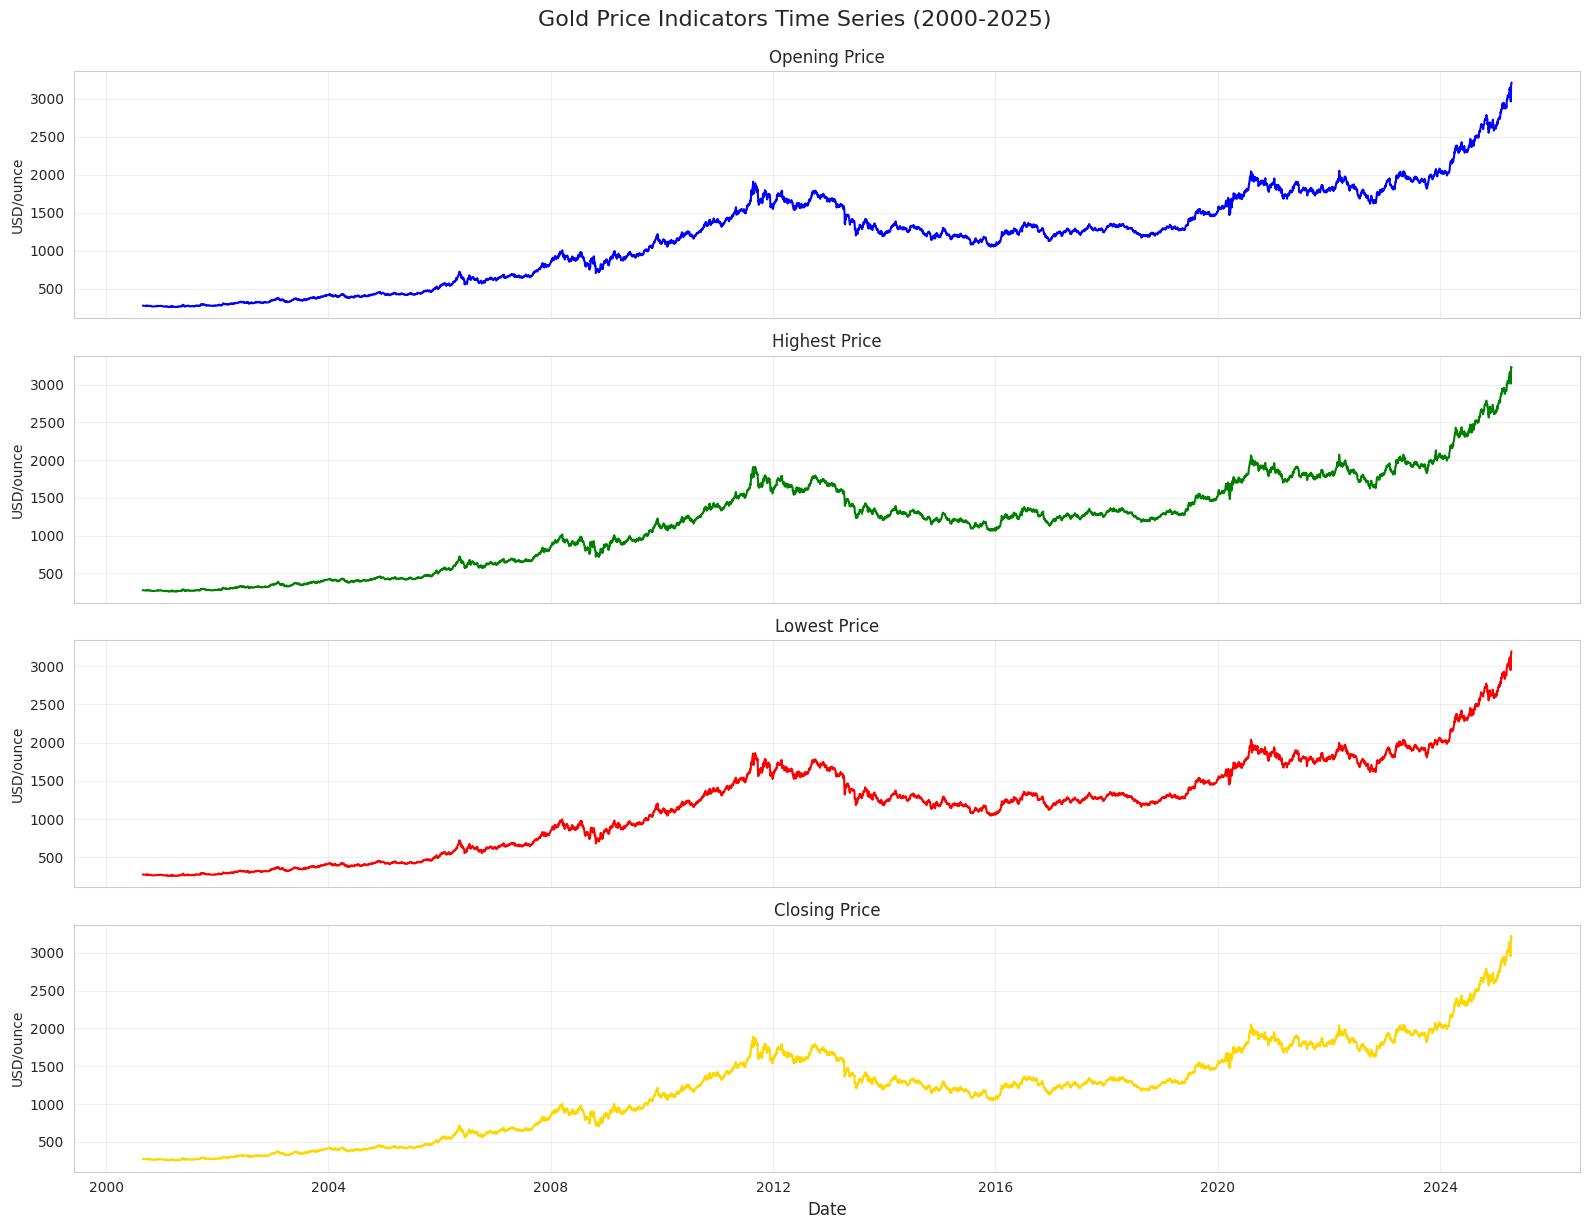

Data time range: 2000-08-30 to 2025-04-14


In [ ]:
# Creating time series plots for all four price indicators
plt.figure(figsize=(16, 10))

# Set timestamp as index
df_plot = df.set_index('timestamp')

# Create four subplots
fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True)

# Plot opening price
axes[0].plot(df_plot.index, df_plot['open'], color='blue', linewidth=1.5)
axes[0].set_title('Opening Price', fontsize=12)
axes[0].set_ylabel('USD/ounce')
axes[0].grid(True, alpha=0.3)

# Plot highest price
axes[1].plot(df_plot.index, df_plot['high'], color='green', linewidth=1.5)
axes[1].set_title('Highest Price', fontsize=12)
axes[1].set_ylabel('USD/ounce')
axes[1].grid(True, alpha=0.3)

# Plot lowest price
axes[2].plot(df_plot.index, df_plot['low'], color='red', linewidth=1.5)
axes[2].set_title('Lowest Price', fontsize=12)
axes[2].set_ylabel('USD/ounce')
axes[2].grid(True, alpha=0.3)

# Plot closing price
axes[3].plot(df_plot.index, df_plot['close'], color='gold', linewidth=1.5)
axes[3].set_title('Closing Price', fontsize=12)
axes[3].set_ylabel('USD/ounce')
axes[3].grid(True, alpha=0.3)

# Set x-axis label
plt.xlabel('Date', fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Add main title
fig.suptitle('Gold Price Indicators Time Series (2000-2025)',
             fontsize=16, y=1.02)

# Display the figure
plt.show()

# Print time range information
print(f"Data time range: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")

## Gold Price Trend Analysis (2000-2025)

### Key Observations from the Time Series Visualization

The visualization of gold prices from 2000 to 2025 reveals several significant patterns and market phases:

1. **Long-term Upward Trend**: Gold prices have shown a strong upward trajectory over the 25-year period, rising from approximately 300 Dollar/ounce in 2000 to over 3,000 Dollar/ounce by 2025.

2. **Major Market Phases**:
   - **2000-2008**: Gradual upward trend, with prices reaching around 1,000/ounce
   - **2008-2012**: Accelerated growth period following the global financial crisis
   - **2012-2016**: Market correction and consolidation phase
   - **2016-2020**: Moderate recovery and stabilization
   - **2020-2025**: Strong bullish momentum, with prices breaking new all-time highs

3. **Notable Price Peaks**:
   - A significant peak around 2011-2012 (approximately 1,800 Dollar/ounce)
   - Multiple consecutive peaks during 2020-2022
   - Unprecedented price levels in 2024-2025, exceeding 3,000 Dollar/ounce

4. **Price Indicator Similarity**: All four price indicators (open, high, low, close) display nearly identical patterns over the long term, indicating that daily price variations are minimal compared to the overall trend.



## 黄金价格走势分析（2000-2025）

### 时间序列可视化的主要观察结果

2000年至2025年黄金价格的可视化展示了几个显著的模式和市场阶段：

1. **长期上升趋势**：黄金价格在这25年期间显示出强劲的上升轨迹，从2000年的约300美元/盎司上升到2025年的超过3,000美元/盎司。

2. **主要市场阶段**：
   - **2000-2008年**：逐渐上升趋势，价格达到约1,000美元/盎司
   - **2008-2012年**：全球金融危机后的加速增长期
   - **2012-2016年**：市场调整和巩固阶段
   - **2016-2020年**：适度复苏和稳定期
   - **2020-2025年**：强劲的看涨势头，价格突破新的历史高点

3. **显著价格峰值**：
   - 2011-2012年左右的显著峰值（约1,800美元/盎司）
   - 2020-2022年期间的多个连续峰值
   - 2024-2025年前所未有的价格水平，超过3,000美元/盎司

4. **价格指标相似性**：四个价格指标（开盘价、最高价、最低价、收盘价）在长期内显示几乎相同的模式，表明日内价格变化相对于整体趋势而言微不足道。





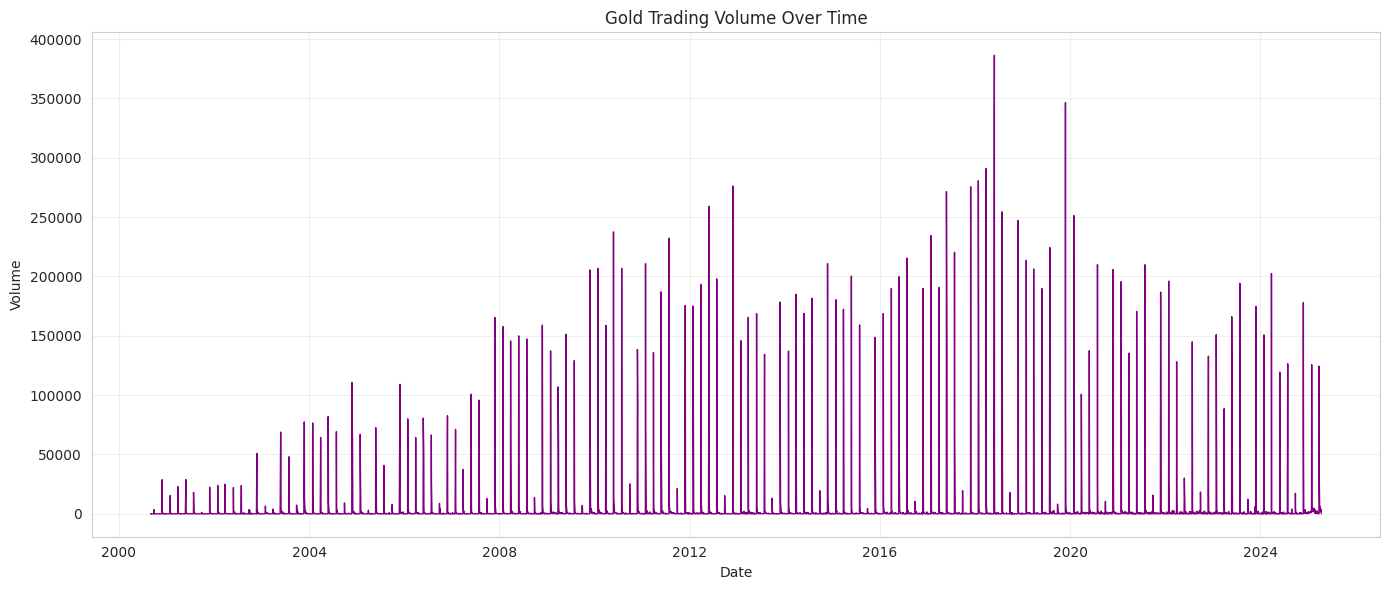

In [ ]:
# Volume Time Series Visualization
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['volume'], color='purple', linewidth=1)
plt.title('Gold Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Gold Trading Volume Analysis (2000-2025)

### Key Observations

The visualization of gold trading volume from 2000 to 2025 reveals several important patterns:

1. **Sporadic Trading Activity**: The volume data appears highly intermittent, with many periods showing zero or minimal volume followed by sudden spikes

2. **Volume Evolution Over Time**:
   - **2000-2004**: Minimal trading volume with occasional small spikes
   - **2004-2008**: Gradual increase in both frequency and magnitude of volume spikes
   - **2008-2012**: Significant increase in trading volume, coinciding with the global financial crisis and gold price rally
   - **2012-2020**: Consistently higher trading volumes with regular spikes above 200,000
   - **2018-2019**: Contains the highest volume peaks, with several spikes approaching 400,000
   - **Post-2020**: Continued volatility in trading volumes but fewer extreme peaks

3. **Notable Volume Spikes**: The most dramatic volume spikes occurred around 2018-2019, with two exceptional peaks reaching nearly 400,000 in volume, potentially indicating major market events or institutional transactions.

4. **Volume-Price Relationship**: The periods of increased trading volume generally align with significant price movements in the gold market, particularly during the 2008-2012 bull run and the post-2020 price increases.


## 黄金交易量分析（2000-2025）

### 主要观察结果

2000年至2025年黄金交易量的可视化展示了几个重要模式：

1. **零星交易活动**：交易量数据呈现高度间歇性，许多时期显示为零或最小交易量
2. **交易量随时间的演变**：
   - **2000-2004年**：交易量极小，偶尔出现小幅峰值
   - **2004-2008年**：交易量峰值的频率和幅度逐渐增加
   - **2008-2012年**：交易量显著增加，与全球金融危机和黄金价格上涨同步
   - **2012-2020年**：交易量持续较高，规律性出现超过200,000的峰值
   - **2018-2019年**：包含最高的交易量峰值，几个峰值接近400,000
   - **2020年后**：交易量持续波动但极端峰值减少

3. **显著交易量峰值**：最剧烈的交易量峰值出现在2018-2019年左右，两个特殊峰值接近400,000，可能表明重大市场事件或机构交易。

4. **交易量与价格关系**：交易量增加的时期通常与黄金市场的显著价格变动一致，特别是在2008-2012年的牛市期间和2020年后的价格上涨。


## Seasonal Analysis of Gold Prices

This code segment performs a comprehensive temporal analysis of gold price data to identify potential seasonal patterns across different time intervals. The analysis consists of the following key steps:

1. **Data Preparation**:
   - Sets the timestamp column as the DataFrame index to enable time-based operations
   - Creates new features based on date components (year, month, quarter, day of week)

2. **Multi-Period Aggregation**:
   - Resamples data to monthly, quarterly, and yearly intervals
   - Calculates mean closing prices and extremes (high/low) for each period

3. **Time Series Visualization**:
   - Creates a three-panel visualization showing price trends across different time scales
   - Displays monthly averages (gold line), quarterly averages (orange line), and yearly averages (red line)
   - Each panel includes appropriate titles, labels, and grid lines

4. **Monthly Seasonality Analysis**:
   - Groups data by month and calculates average gold prices for each month across all years
   - Visualizes monthly patterns using a bar chart with month names on the x-axis
   - Identifies if certain months consistently show higher or lower gold prices


## 黄金价格季节性分析

该代码段对黄金价格数据进行了全面的时间维度分析，以识别不同时间间隔内的潜在季节性模式。分析包括以下关键步骤：

1. **数据准备**：
   - 将时间戳列设置为DataFrame索引，以启用基于时间的操作
   - 基于日期组件创建新特征（年、月、季度、星期几）

2. **多周期聚合**：
   - 将数据重采样为月度、季度和年度间隔
   - 计算每个周期的平均收盘价和极值（最高/最低）

3. **时间序列可视化**：
   - 创建三面板可视化，显示不同时间尺度的价格趋势
   - 显示月平均值（金线）、季度平均值（橙线）和年平均值（红线）
   - 每个面板包括适当的标题、标签和网格线

4. **月度季节性分析**：
   - 按月份分组数据并计算所有年份中每个月的平均黄金价格
   - 使用条形图可视化月度模式，x轴显示月份名称
   - 识别某些月份是否持续显示更高或更低的黄金价格


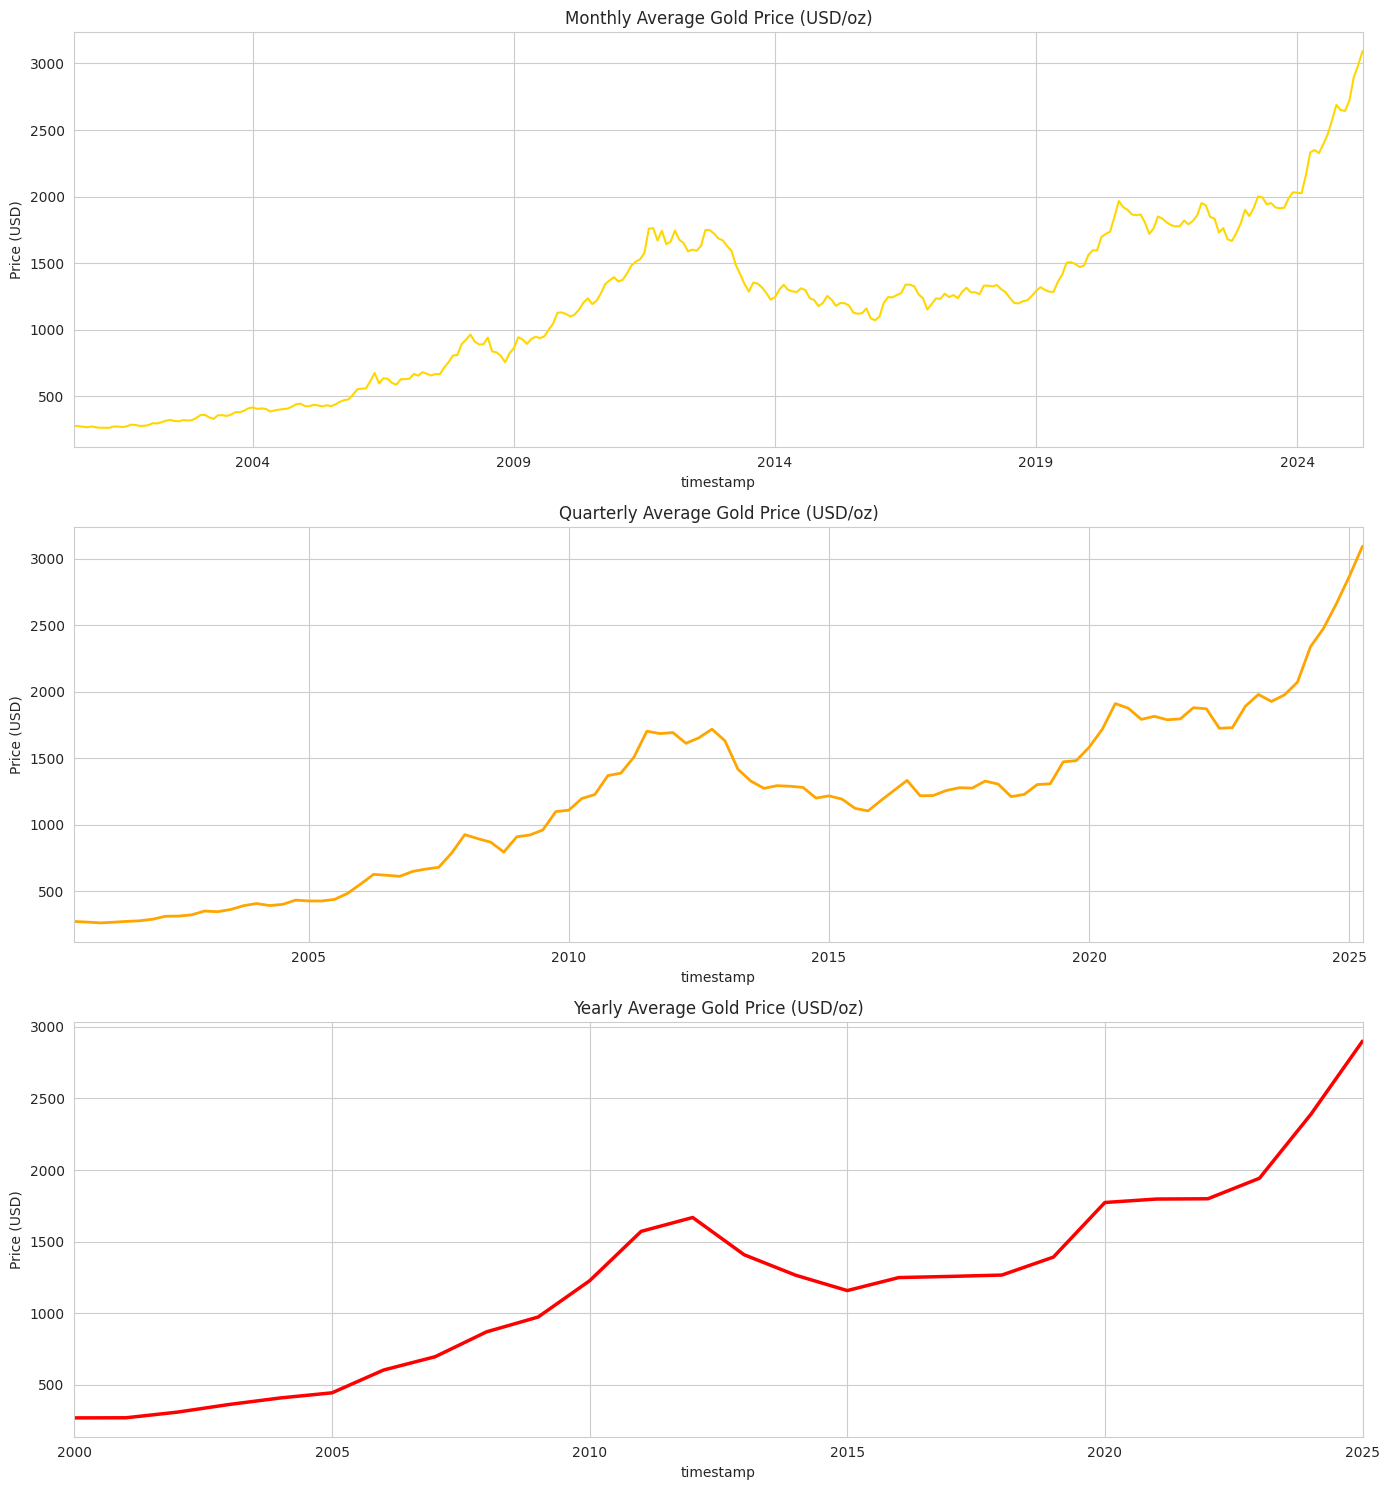

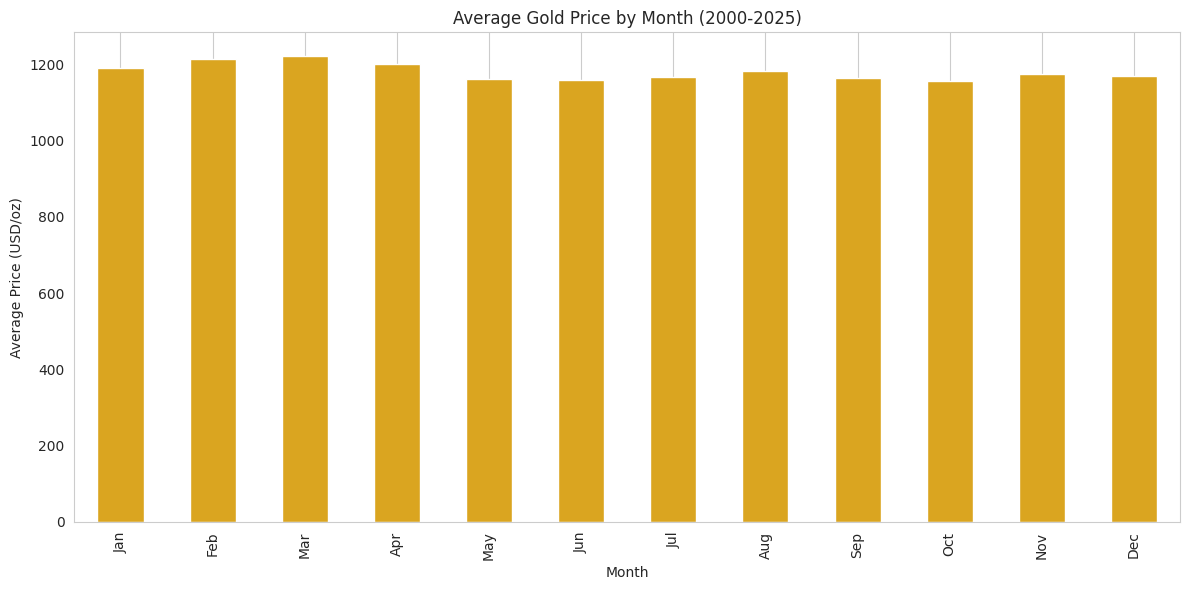

In [ ]:
# Monthly, quarterly, and yearly price analysis for seasonality patterns

# Set timestamp as index first
df = df.set_index('timestamp')

# Create date-based features
df['year'] = df.index.year
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['day_of_week'] = df.index.dayofweek

# Resample to different time periods
monthly_avg = df.resample('M').agg({'close': 'mean', 'high': 'max', 'low': 'min'})
quarterly_avg = df.resample('Q').agg({'close': 'mean', 'high': 'max', 'low': 'min'})
yearly_avg = df.resample('Y').agg({'close': 'mean', 'high': 'max', 'low': 'min'})

# Plot the time series for each period
fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=False)

# Monthly average price
monthly_avg['close'].plot(ax=axes[0], color='gold', linewidth=1.5)
axes[0].set_title('Monthly Average Gold Price (USD/oz)')
axes[0].set_ylabel('Price (USD)')
axes[0].grid(True)

# Quarterly average price
quarterly_avg['close'].plot(ax=axes[1], color='orange', linewidth=2)
axes[1].set_title('Quarterly Average Gold Price (USD/oz)')
axes[1].set_ylabel('Price (USD)')
axes[1].grid(True)

# Yearly average price
yearly_avg['close'].plot(ax=axes[2], color='red', linewidth=2.5)
axes[2].set_title('Yearly Average Gold Price (USD/oz)')
axes[2].set_ylabel('Price (USD)')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Analyze seasonal patterns by month
monthly_pattern = df.groupby('month')['close'].mean()

plt.figure(figsize=(12, 6))
ax = monthly_pattern.plot(kind='bar', color='goldenrod')
ax.set_title('Average Gold Price by Month (2000-2025)')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price (USD/oz)')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.grid(axis='y')
plt.tight_layout()
plt.show()

## Analysis of Gold Price Trends (2000-2025)

The gold price time series visualizations reveal several significant patterns and historical trends:

### Key Observations

1. **Long-term Growth Trajectory**
   - Gold prices have followed a clear upward trajectory over the 25-year period, increasing from around 300/oz in 2000 to over 3,000/oz by 2025
   - The overall price has increased approximately 10-fold

2. **Major Price Cycles**
   - **2000-2011**: Steady growth phase, with prices rising from under 300/oz to nearly 1,800/oz
   - **2011-2015**: Correction period, with prices declining by approximately 30%
   - **2016-2019**: Consolidation phase, with prices moving sideways between 1,100-1,350/oz
   - **2019-2023**: Renewed bull market, with prices breaking past 2,000/oz
   - **2023-2025**: Dramatic acceleration, reaching all-time highs above 3,000/oz

3. **Notable Market Events**
   - 2008-2011: Rapid price appreciation during the global financial crisis and subsequent quantitative easing
   - 2011-2013: Major correction after reaching what was then an all-time high
   - 2020: Sharp upward movement coinciding with the COVID-19 pandemic
   - 2023-2025: Steepest price increase in the dataset, potentially reflecting global economic uncertainties

4. **Volatility Patterns**
   - Higher volatility during price uptrends than during consolidation periods
   - Monthly chart shows more price noise, while quarterly and yearly charts better highlight the structural trends

### Implications

- Gold has proven to be a strong inflation hedge during this 25-year period
- Price action shows distinct multi-year cycles of accumulation, price appreciation, and correction
- The accelerating trend in recent years suggests continued momentum in gold markets
- Major economic crises have historically corresponded with significant gold price appreciation


## 黄金价格趋势分析（2000-2025年）

黄金价格时间序列可视化图表揭示了多个重要模式和历史趋势：

### 主要观察结果

1. **长期增长轨迹**
   - 黄金价格在这25年期间呈现明显的上升轨迹，从2000年约300美元/盎司增长到2025年超过3,000美元/盎司
   - 总体价格增长了约10倍

2. **主要价格周期**
   - **2000-2011年**：稳定增长阶段，价格从不到300美元/盎司上升至接近1,800美元/盎司
   - **2011-2015年**：调整期，价格下跌约30%
   - **2016-2019年**：盘整阶段，价格在1,100-1,350美元/盎司区间横向移动
   - **2019-2023年**：牛市重启，价格突破2,000美元/盎司
   - **2023-2025年**：加速上涨，突破3,000美元/盎司创历史新高

3. **显著市场事件**
   - 2008-2011年：全球金融危机和随后的量化宽松期间价格快速上涨
   - 2011-2013年：达到当时历史高位后的重大调整
   - 2020年：与COVID-19疫情同期的价格急剧上涨
   - 2023-2025年：数据集中最陡峭的价格上涨，可能反映全球经济不确定性

4. **波动性模式**
   - 价格上升趋势期间的波动性高于盘整期间
   - 月度图表显示更多价格噪音，而季度和年度图表更好地突显结构性趋势

### 意义

- 黄金在这25年期间已证明是有效的通胀对冲工具
- 价格走势显示出明显的多年周期：积累、价格上涨和调整
- 近年来加速上涨的趋势表明黄金市场持续保持动能
- 重大经济危机历来与黄金价格显著升值相对应


## Volatility and Return Distribution Analysis

The addition of daily return distributions, intraday volatility, and price movement characteristics would significantly enhance the EDA by providing deeper insights into gold's trading behavior and risk characteristics:

### 1. Daily Returns Distribution

Daily returns analysis would reveal:
- The statistical properties of gold price movements (mean, variance, skewness, kurtosis)
- Identification of fat tails or extreme values that indicate market shocks
- Whether returns follow a normal distribution or exhibit anomalies
- Comparison of returns distribution across different market cycles
- Quantification of gold's risk profile through volatility metrics

### 2. Intraday Price Range Distribution

Analyzing (high-low)/open ratios would highlight:
- The typical daily volatility of gold prices
- How volatility has evolved over different market regimes
- The relationship between volatility and price direction
- Detection of periods with anomalous trading ranges
- Potential for developing volatility-based trading strategies

### 3. Opening-Closing Price Differential

Examining (close-open)/open distributions would provide:
- Insights into daily price direction bias
- Understanding of intraday momentum patterns
- Detection of potential day-of-week effects
- Identification of trading sessions with significant imbalances between buyers and sellers
- Patterns that could inform day trading approaches for gold



## 波动性和收益分布分析

添加日收益率分布、日内波动幅度和价格变动特征分析将显著增强EDA部分，提供关于黄金交易行为和风险特征的更深入见解：

### 1. 日收益率分布

日收益率分析将揭示：
- 黄金价格变动的统计特性（均值、方差、偏度、峰度）
- 识别表示市场冲击的肥尾或极端值
- 收益率是否遵循正态分布或表现出异常
- 比较不同市场周期的收益率分布
- 通过波动性指标量化黄金的风险特征

### 2. 日内价格区间分布

分析(high-low)/open比率将突显：
- 黄金价格的典型日波动性
- 波动性在不同市场机制下的演变
- 波动性与价格方向之间的关系
- 检测具有异常交易区间的时期
- 开发基于波动性的交易策略的潜力

### 3. 开盘-收盘价差分析

研究(close-open)/open分布将提供：
- 日内价格方向偏向的洞察
- 理解日内动量模式
- 检测潜在的周内效应
- 识别买卖双方存在显著不平衡的交易时段
- 可能为黄金日间交易提供信息的模式


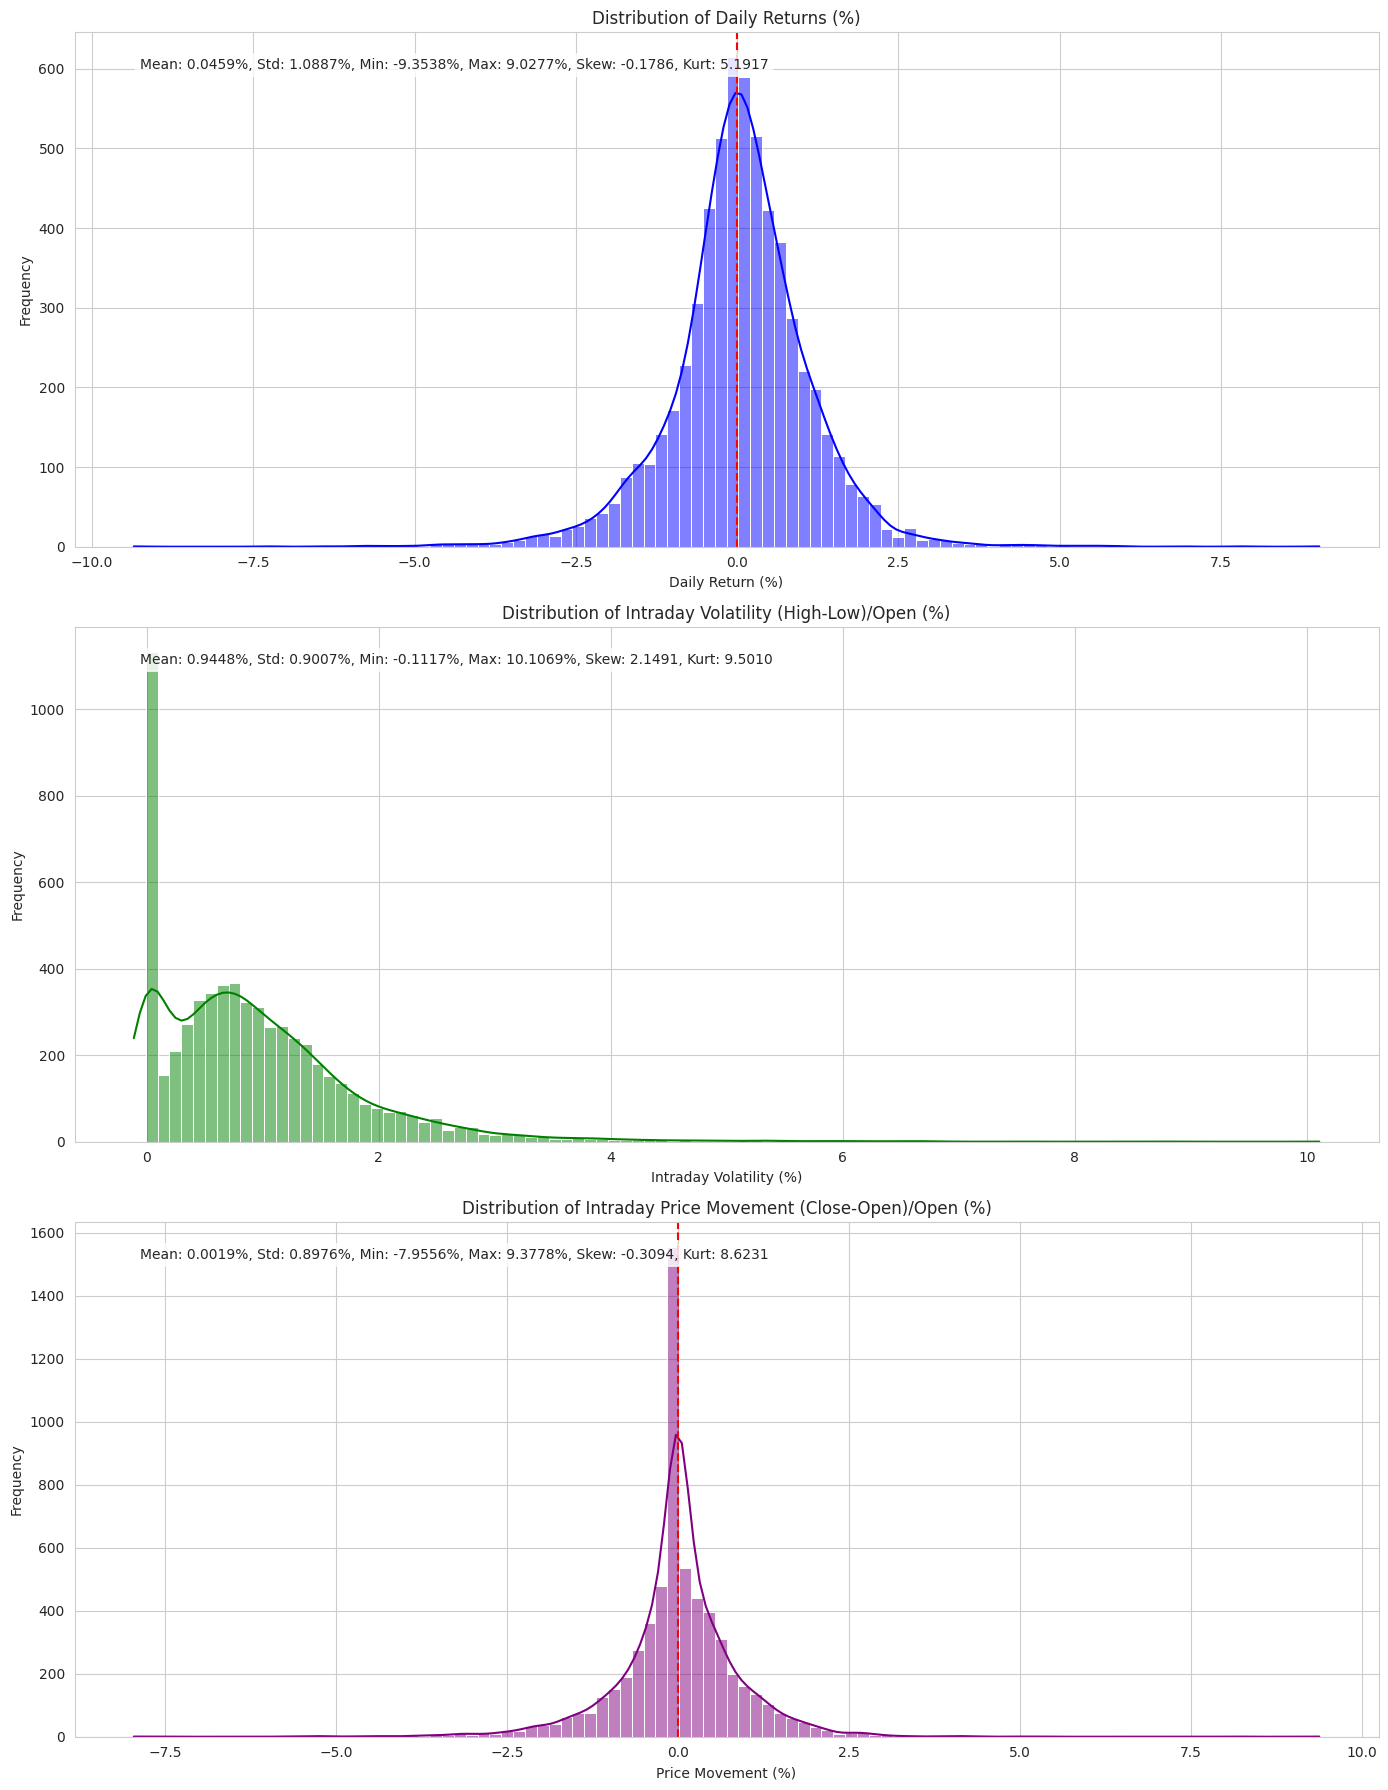

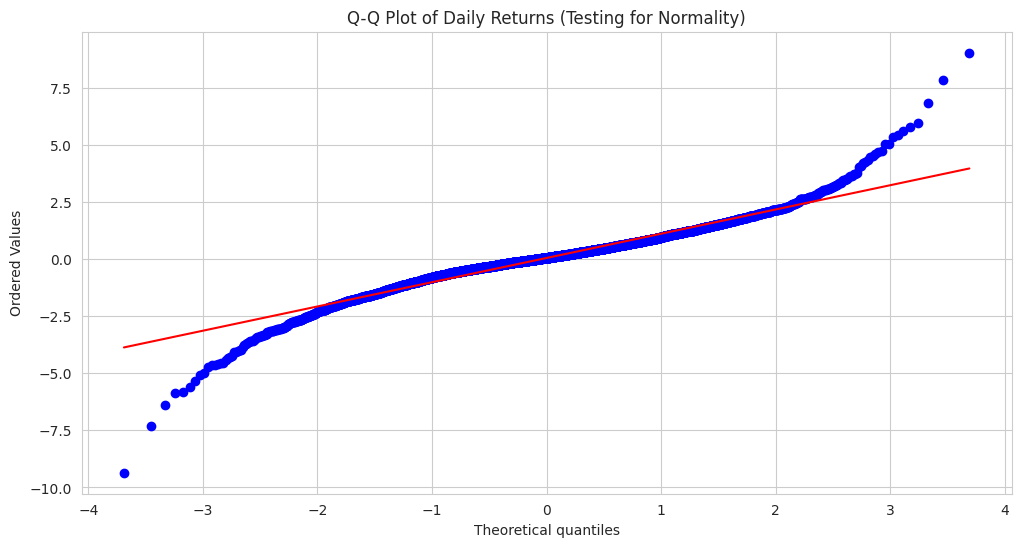

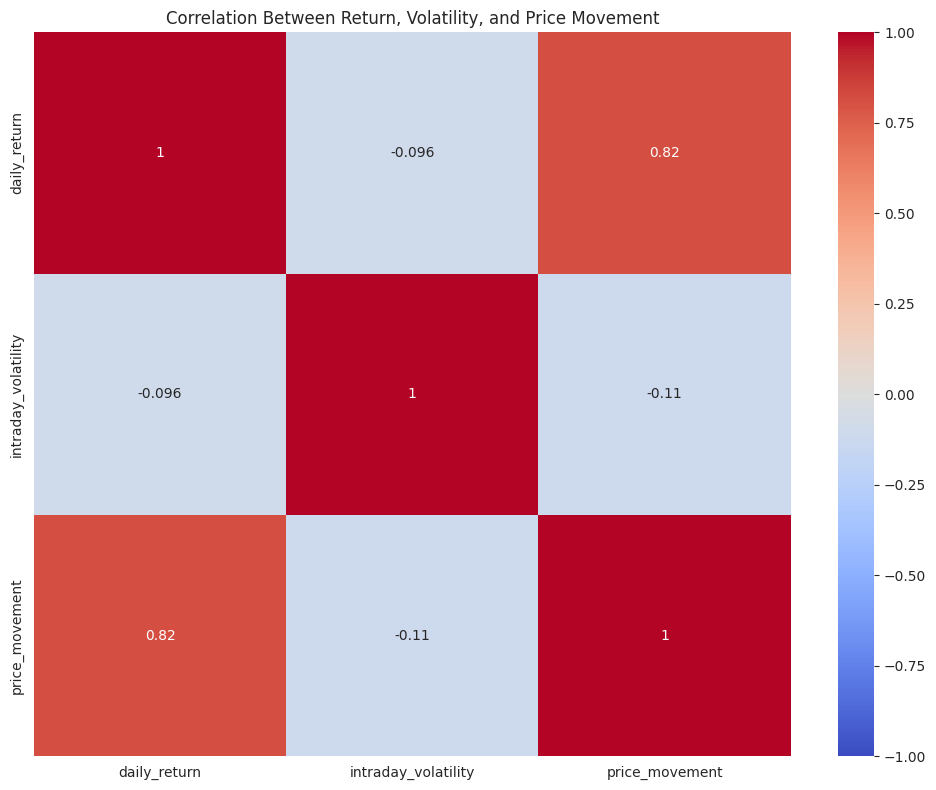

In [ ]:
# Daily Returns, Volatility, and Intraday Price Movement Analysis

# Check if timestamp is already the index, if not, set it
if 'timestamp' in df.columns:
    df = df.set_index('timestamp').sort_index()
else:
    # If timestamp is already the index, just make sure it's sorted
    df = df.sort_index()

# Calculate daily returns
df['daily_return'] = df['close'].pct_change() * 100  # in percentage

# Calculate intraday volatility as (high-low)/open
df['intraday_volatility'] = (df['high'] - df['low']) / df['open'] * 100  # in percentage

# Calculate open-close differential as (close-open)/open
df['price_movement'] = (df['close'] - df['open']) / df['open'] * 100  # in percentage

# Create a figure with 3 subplots for distribution analysis
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=False)

# 1. Daily returns distribution
sns.histplot(df['daily_return'].dropna(), kde=True, ax=axes[0], color='blue', bins=100)
axes[0].set_title('Distribution of Daily Returns (%)')
axes[0].set_xlabel('Daily Return (%)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(x=0, color='red', linestyle='--')
axes[0].grid(True)
# Add descriptive statistics as text
returns_stats = f"Mean: {df['daily_return'].mean():.4f}%, Std: {df['daily_return'].std():.4f}%, \
Min: {df['daily_return'].min():.4f}%, Max: {df['daily_return'].max():.4f}%, \
Skew: {df['daily_return'].skew():.4f}, Kurt: {df['daily_return'].kurtosis():.4f}"
axes[0].text(0.05, 0.95, returns_stats, transform=axes[0].transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. Intraday volatility distribution
sns.histplot(df['intraday_volatility'].dropna(), kde=True, ax=axes[1], color='green', bins=100)
axes[1].set_title('Distribution of Intraday Volatility (High-Low)/Open (%)')
axes[1].set_xlabel('Intraday Volatility (%)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)
# Add descriptive statistics as text
volatility_stats = f"Mean: {df['intraday_volatility'].mean():.4f}%, Std: {df['intraday_volatility'].std():.4f}%, \
Min: {df['intraday_volatility'].min():.4f}%, Max: {df['intraday_volatility'].max():.4f}%, \
Skew: {df['intraday_volatility'].skew():.4f}, Kurt: {df['intraday_volatility'].kurtosis():.4f}"
axes[1].text(0.05, 0.95, volatility_stats, transform=axes[1].transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3. Price movement distribution (close-open)/open
sns.histplot(df['price_movement'].dropna(), kde=True, ax=axes[2], color='purple', bins=100)
axes[2].set_title('Distribution of Intraday Price Movement (Close-Open)/Open (%)')
axes[2].set_xlabel('Price Movement (%)')
axes[2].set_ylabel('Frequency')
axes[2].axvline(x=0, color='red', linestyle='--')
axes[2].grid(True)
# Add descriptive statistics as text
movement_stats = f"Mean: {df['price_movement'].mean():.4f}%, Std: {df['price_movement'].std():.4f}%, \
Min: {df['price_movement'].min():.4f}%, Max: {df['price_movement'].max():.4f}%, \
Skew: {df['price_movement'].skew():.4f}, Kurt: {df['price_movement'].kurtosis():.4f}"
axes[2].text(0.05, 0.95, movement_stats, transform=axes[2].transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Additional analysis: QQ plot to check normality of returns
plt.figure(figsize=(12, 6))
from scipy import stats
stats.probplot(df['daily_return'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Daily Returns (Testing for Normality)')
plt.grid(True)
plt.show()

# Create a correlation heatmap between the three metrics
plt.figure(figsize=(10, 8))
correlation_df = df[['daily_return', 'intraday_volatility', 'price_movement']].dropna()
corr_matrix = correlation_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Between Return, Volatility, and Price Movement')
plt.tight_layout()
plt.show()

## Analysis of Gold Price Statistical Distributions

### Daily Returns Distribution Analysis

The distribution of daily gold price returns reveals several important characteristics of the gold market:

- **Moderate Positive Drift**: Mean return of 0.045% indicates a slight upward bias in gold prices over the long term
- **Relatively Low Volatility**: Standard deviation of 1.09% suggests moderate day-to-day price fluctuations
- **Fat Tails**: Kurtosis of 5.19 (significantly above 3.0 for normal distribution) indicates more frequent extreme price movements than would be expected in a normal distribution
- **Slight Negative Skew**: Skewness of -0.17 suggests that large negative returns occur slightly more frequently than large positive returns

The blue histogram shows most returns clustered tightly around zero, confirming that most trading days see modest price changes, while the extended tails capture less frequent but significant price shocks.

### Intraday Volatility Distribution Analysis

The green histogram of (high-low)/open reveals the pattern of daily price ranges:

- **Low Typical Volatility**: Mean daily range of 0.94% indicates that gold typically trades within a narrow daily band
- **Strong Right Skew**: Skewness of 2.14 shows that while most days exhibit low volatility, high-volatility days occur with notable frequency
- **Extreme Peakedness**: Kurtosis of 9.50 demonstrates that the volatility distribution is highly concentrated, with occasional extreme outliers
- **Volatility Clustering**: The long right tail confirms periods of heightened market stress when daily ranges expand dramatically

This pattern is characteristic of a market that remains calm during normal conditions but experiences episodic volatility spikes.

### Price Movement Direction Analysis

The purple histogram showing (close-open)/open provides insights into intraday price direction:

- **Directional Neutrality**: Mean of 0.001% indicates no systematic bias between opening and closing prices
- **Tight Range**: Standard deviation of 0.89% is lower than daily returns, suggesting some mean-reversion during trading hours
- **Fat Tails**: Kurtosis of 8.62 shows that extreme intraday moves occur more frequently than a normal distribution would predict
- **Slight Downward Bias**: Skewness of -0.31 suggests a slight tendency for prices to decline during the trading day

The concentrated distribution around zero indicates that most trading days close near their opening levels.

### Normality Test (Q-Q Plot)

The Q-Q plot provides a critical assessment of how gold returns deviate from normality:

- The middle section roughly follows the straight line, indicating that moderate returns approximate normal distribution
- Significant deviations in both tails (especially the upper tail) confirm that extreme returns occur more frequently than predicted by normal distribution
- This non-normality has important implications for risk modeling, as traditional models based on normal distributions will underestimate tail risks

### Correlation Analysis

The heatmap reveals important relationships between different price metrics:

- **Return-Price Movement Correlation**: High positive correlation (0.82) between daily returns and intraday price movement indicates that daily returns are largely driven by intraday price changes rather than overnight gaps
- **Return-Volatility Independence**: Near-zero correlation (-0.096) between returns and volatility suggests that the magnitude of price range has little relationship with price direction
- **Volatility-Direction Weak Relation**: Slight negative correlation (-0.11) between volatility and price movement suggests that higher volatility days have a weak tendency toward price declines


## 黄金价格统计分布分析

### 日收益率分布分析

黄金价格日收益率分布揭示了黄金市场的几个重要特征：

- **温和正向漂移**：平均收益率为0.045%，表明黄金价格长期呈现轻微上升趋势
- **相对低波动性**：标准差为1.09%，表明日常价格波动相对温和
- **肥尾分布**：峰度为5.19（显著高于正态分布的3.0），表明极端价格变动的频率高于正态分布预期
- **轻微负偏**：偏度为-0.17，表明大幅负收益出现的频率略高于大幅正收益

蓝色直方图显示大多数收益率紧密聚集在零附近，证实大多数交易日价格变化不大，而延伸的尾部捕捉到较少见但显著的价格冲击。

### 日内波动性分布分析

(high-low)/open的绿色直方图揭示了日价格区间的模式：

- **典型低波动性**：平均日区间为0.94%，表明黄金通常在狭窄的日内区间交易
- **强烈右偏**：偏度为2.14，表明虽然大多数日子波动性低，但高波动性日子出现频率明显
- **极端尖峰**：峰度为9.50，表明波动性分布高度集中，偶有极端异常值
- **波动性聚集**：长右尾确认了市场压力加剧时期日间区间显著扩大

这种模式是市场在正常条件下保持平静但在特定时期经历波动性飙升的特征。

### 价格变动方向分析

显示(close-open)/open的紫色直方图提供了日内价格方向的洞察：

- **方向中性**：均值为0.001%，表明开盘和收盘价之间没有系统性偏差
- **区间紧凑**：标准差为0.89%，低于日收益率，表明交易时段内存在一定的均值回归
- **肥尾分布**：峰度为8.62，表明极端日内波动的频率高于正态分布预期
- **轻微下行偏差**：偏度为-0.31，表明价格在交易日内略有下降的趋势

围绕零的集中分布表明大多数交易日收盘价接近其开盘水平。

### 正态性检验（Q-Q图）

Q-Q图对黄金收益率偏离正态分布提供了关键评估：

- 中间部分大致遵循直线，表明适度收益率近似正态分布
- 两个尾部（尤其是上尾部）的显著偏离证实极端收益率出现的频率高于正态分布预测
- 这种非正态性对风险建模有重要影响，因为基于正态分布的传统模型将低估尾部风险

### 相关性分析

热图揭示了不同价格指标之间的重要关系：

- **收益率-价格变动相关性**：日收益率与日内价格变动之间的高度正相关（0.82）表明日收益率主要由日内价格变化而非隔夜缺口驱动
- **收益率-波动性独立性**：收益率与波动性之间的接近零相关（-0.096）表明价格区间幅度与价格方向关系不大
- **波动性-方向弱关系**：波动性与价格变动之间的轻微负相关（-0.11）表明高波动性日子有弱趋势朝向价格下降


# 3.Headlines Data Analysis


- **Text Preprocessing & Tokenization**  
  - Normalize text to lowercase, remove punctuation and digits, and split on whitespace.  
  - Filter out stopwords (both standard and domain-specific) and tokens shorter than a threshold.  
  - Prepare a clean token list for frequency analysis.

- **Daily Headline Volume**  
  - Count headlines per day by splitting the headline string and aggregating by date.  
  - Plot a histogram of daily counts, adding mean and median reference lines to highlight central tendency.  
  - Print descriptive statistics (count, mean, std, min, 25th/50th/75th percentiles, max) to quantify variability and detect outliers.


- **Yearly Keyword Extraction**  
  - Group headlines by year and concatenate them into one text blob per year.  
  - Tokenize and count word frequencies for each year.  
  - Generate a word cloud to visualize the top tokens annually.  
  - Build a comparison table listing the top 5 most common words per year, revealing term evolution over time.

- **Data Quality Checks**  
  - Identify and remove duplicate or missing headlines; report the number of unique entries.  
  - Calculate vocabulary size and coverage to gauge the richness of headline text.

These analyses uncover the volume dynamics, structural patterns, and key terms in the headline corpus, laying a solid foundation for downstream sentiment scoring and feature engineering.

# 3.新闻标题数据分析

- **文本预处理与分词**  
  - 文本全部转小写，移除标点和数字，按空格分词。  
  - 过滤常用停用词（包括领域停用词）和长度过短的词。  
  - 为后续词频统计和关键词提取准备清洗后的词列表。

- **每日标题数量分析**  
  - 通过分割标题字符串按日期统计每日标题总数。  
  - 绘制每日标题数量直方图，并添加均值和中位数参考线，突出集中趋势。  
  - 打印描述性统计（计数、均值、标准差、最小值、25%/50%/75%分位数、最大值），量化波动并检测异常值。

- **按年关键词提取**  
  - 按年份分组，将同年所有标题合并成一段文本。  
  - 对每年文本进行分词并统计词频。  
  - 生成词云，直观展示每年高频词。  
  - 构建按年排名前 5 的关键词对比表，揭示词汇演变趋势。

- **数据质量检查**  
  - 检查并剔除重复或缺失标题，报告唯一标题数量。  
  - 计算词汇量和覆盖率，以评估标题文本的丰富度。

上述分析展示了标题数据的数量特征、结构模式和核心词汇，为后续情感评分和特征工程奠定了坚实基础。

In [ ]:
# Install required packages
%pip install nltk wordcloud

In [ ]:
import re

def clean_text(text):
    """Remove non-English characters from text, keeping only ASCII letters, digits, spaces, and basic punctuation."""
    if isinstance(text, str):
        return re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Overwrite the original 'headlines' column with the cleaned text
df['headlines'] = df['headlines'].apply(clean_text)


## Daily Headline Count Analysis

This code performs a statistical analysis of the number of news headlines related to gold prices published each day. The main features include:

### Data Processing
- Creates a copy of the original dataframe to preserve the original data
- Extracts the date component from the timestamp index
- Counts the number of headlines per row by counting separator characters (`/`) plus 1
- Aggregates the headline counts by date to get the total number of headlines for each day

### Visualization
- Generates a histogram showing the distribution of daily headline counts
- Adds a density curve (KDE) to visualize the probability distribution
- Marks the mean value with a red dashed line
- Marks the median value with a green dashed line

### Statistical Summary
- Displays descriptive statistics for the daily headline counts:
  - Count (number of days analyzed)
  - Mean (average headlines per day)
  - Standard deviation
  - Minimum and maximum values
  - Quartiles (25%, 50%, 75%)

This analysis helps identify patterns in news coverage intensity over time, providing insights into the volume of market information available to traders on different days. Such information can be valuable for subsequent correlation analysis with gold price movements.

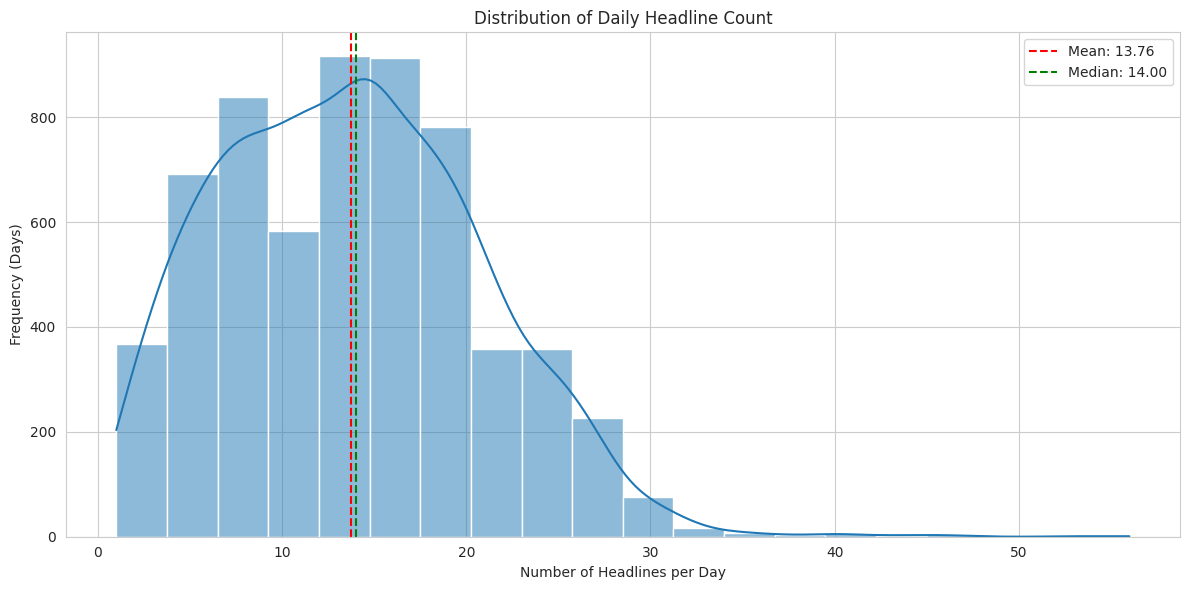

Daily Headline Count Statistics:
count    6151.000000
mean       13.759551
std         7.054323
min         1.000000
25%         8.000000
50%        14.000000
75%        19.000000
max        56.000000
Name: headline_count, dtype: float64


In [ ]:
# Simplified function to analyze daily headline counts
def analyze_daily_headlines(df):
    # Create a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()

    # Extract date from index
    if isinstance(df.index, pd.DatetimeIndex):
        df_copy['date'] = df.index.date
    else:
        df_copy['date'] = pd.to_datetime(df.index).date

    # Count headlines by counting the '/' separators plus 1
    df_copy['headline_count'] = df_copy['headlines'].str.count('/') + 1

    # Aggregate by date to get total headline count for each day
    daily_counts = df_copy.groupby('date')['headline_count'].sum().reset_index()

    # Plot histogram of daily headline counts
    plt.figure(figsize=(12, 6))
    sns.histplot(daily_counts['headline_count'], bins=20, kde=True)
    plt.title('Distribution of Daily Headline Count')
    plt.xlabel('Number of Headlines per Day')
    plt.ylabel('Frequency (Days)')
    plt.axvline(daily_counts['headline_count'].mean(), color='red', linestyle='--',
                label=f'Mean: {daily_counts["headline_count"].mean():.2f}')
    plt.axvline(daily_counts['headline_count'].median(), color='green', linestyle='--',
                label=f'Median: {daily_counts["headline_count"].median():.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print basic statistics
    print("Daily Headline Count Statistics:")
    print(daily_counts['headline_count'].describe())

    return daily_counts

# Call the function to generate the plot
daily_counts = analyze_daily_headlines(df)

## Analysis of Daily Gold News Headlines Count

An examination of the gold-related news headline distribution across 6,151 days reveals:

### Key Statistics:
- **Average coverage**: 13.76 headlines per day
- **Median coverage**: 14 headlines per day
- **Range**: Coverage varies from minimal (1 headline/day) to extensive (56 headlines/day)
- **Consistency**: The middle 50% of days (interquartile range) have between 8 and 19 headlines
- **Distribution shape**: The histogram shows a slight left skew, with most days having between 10-20 headlines

## 黄金新闻每日标题数量分析

对6,151天黄金相关新闻标题分布的研究显示：

### 主要统计数据：
- **平均覆盖率**：每天13.76个标题
- **中位数覆盖率**：每天14个标题
- **范围**：覆盖率从最少（每天1个标题）到最多（每天56个标题）不等
- **一致性**：中间50%的日子（四分位距）每天有8到19个标题
- **分布形状**：直方图显示略微左偏，大多数日子有10-20个标题



# 4.Text Processing and Visualization for Gold Market Headlines

The provided code implements comprehensive text analysis and visualization tools for gold market news headlines, focusing on discovering temporal patterns and key terminology before sentiment analysis. Here's a detailed breakdown:

## NLTK Setup and Preprocessing
- **Resource Initialization**: Downloads essential NLTK packages (punkt tokenizer, stopwords).
- **Text Normalization Pipeline**:
  - Converts to lowercase to standardize text.
  - Removes special characters and numbers using regex (`r'[^a-zA-Z\s]'`).
  - Performs simple whitespace tokenization.
  - Filters out standard English stopwords plus domain-specific terms like 'gold', 'price', 'market'.
  - Discards short tokens (<3 characters).

## Yearly Word Cloud Generation
- **Temporal Segmentation**: Groups headlines by year to track keyword evolution over time.
- **Text Aggregation**: Combines all headlines within each year using a slash separator.
- **Frequency Analysis**: Counts word occurrences after preprocessing for each year.
- **Visual Representation**:
  - Creates word clouds with consistent parameters (800×400px, white background, viridis colormap).
  - Limits to top 100 words per cloud to focus on significant terms.
  - Saves individual word clouds as PNG files with year-specific filenames.

## Multi-Year Comparison
- **Grid Visualization**:
  - Constructs a composite image showing word clouds for all years.
  - Organizes in a grid layout (3 columns) for easy chronological comparison.
  - Saves the complete grid as 'yearly_wordclouds_grid.png'.
- **Tabular Summary**:
  - Extracts top 5 most frequent words per year with their respective counts.
  - Formats as "word (count)" for readability.
  - Creates a structured DataFrame with years as rows and rankings as columns.
  - Applies styling for improved table presentation.



# 4.黄金市场新闻标题的文本处理与可视化

提供的代码实现了针对黄金市场新闻标题的全面文本分析和可视化工具，着重发现时间模式和关键术语，为后续情感分析做准备。以下是详细解析：

## NLTK设置与预处理
- **资源初始化**：下载必要的NLTK包（punkt分词器、停用词）。
- **文本标准化流程**：
  - 转换为小写以标准化文本。
  - 使用正则表达式（`r'[^a-zA-Z\s]'`）移除特殊字符和数字。
  - 执行简单的空格分词。
  - 过滤标准英语停用词及领域特定词如'gold'、'price'、'market'。
  - 删除短词（<3个字符）。

## 年度词云生成
- **时间分段**：按年份分组标题，以追踪关键词随时间的演变。
- **文本聚合**：使用斜杠分隔符合并每年的所有标题。
- **频率分析**：预处理后统计每年的词语出现次数。
- **视觉呈现**：
  - 创建具有一致参数的词云（800×400像素，白色背景，viridis色图）。
  - 每个词云限制为前100个词，聚焦于重要术语。
  - 将单个词云保存为特定年份文件名的PNG图片。

## 多年比较
- **网格可视化**：
  - 构建显示所有年份词云的合成图像。
  - 组织为网格布局（3列）便于时间比较。
  - 将完整网格保存为'yearly_wordclouds_grid.png'。
- **表格摘要**：
  - 提取每年频率最高的5个词及其计数。
  - 格式化为"词语（计数）"提高可读性。
  - 创建结构化DataFrame，年份为行，排名为列。
  - 应用样式改善表格呈现。




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Processing data for year 2000...
Processing data for year 2001...
Processing data for year 2002...
Processing data for year 2003...
Processing data for year 2004...
Processing data for year 2005...
Processing data for year 2006...
Processing data for year 2007...
Processing data for year 2008...
Processing data for year 2009...
Processing data for year 2010...
Processing data for year 2011...
Processing data for year 2012...
Processing data for year 2013...
Processing data for year 2014...
Processing data for year 2015...
Processing data for year 2016...
Processing data for year 2017...
Processing data for year 2018...
Processing data for year 2019...
Processing data for year 2020...
Processing data for year 2021...
Processing data for year 2022...
Processing data for year 2023...
Processing data for year 2024...
Processing data for year 2025...


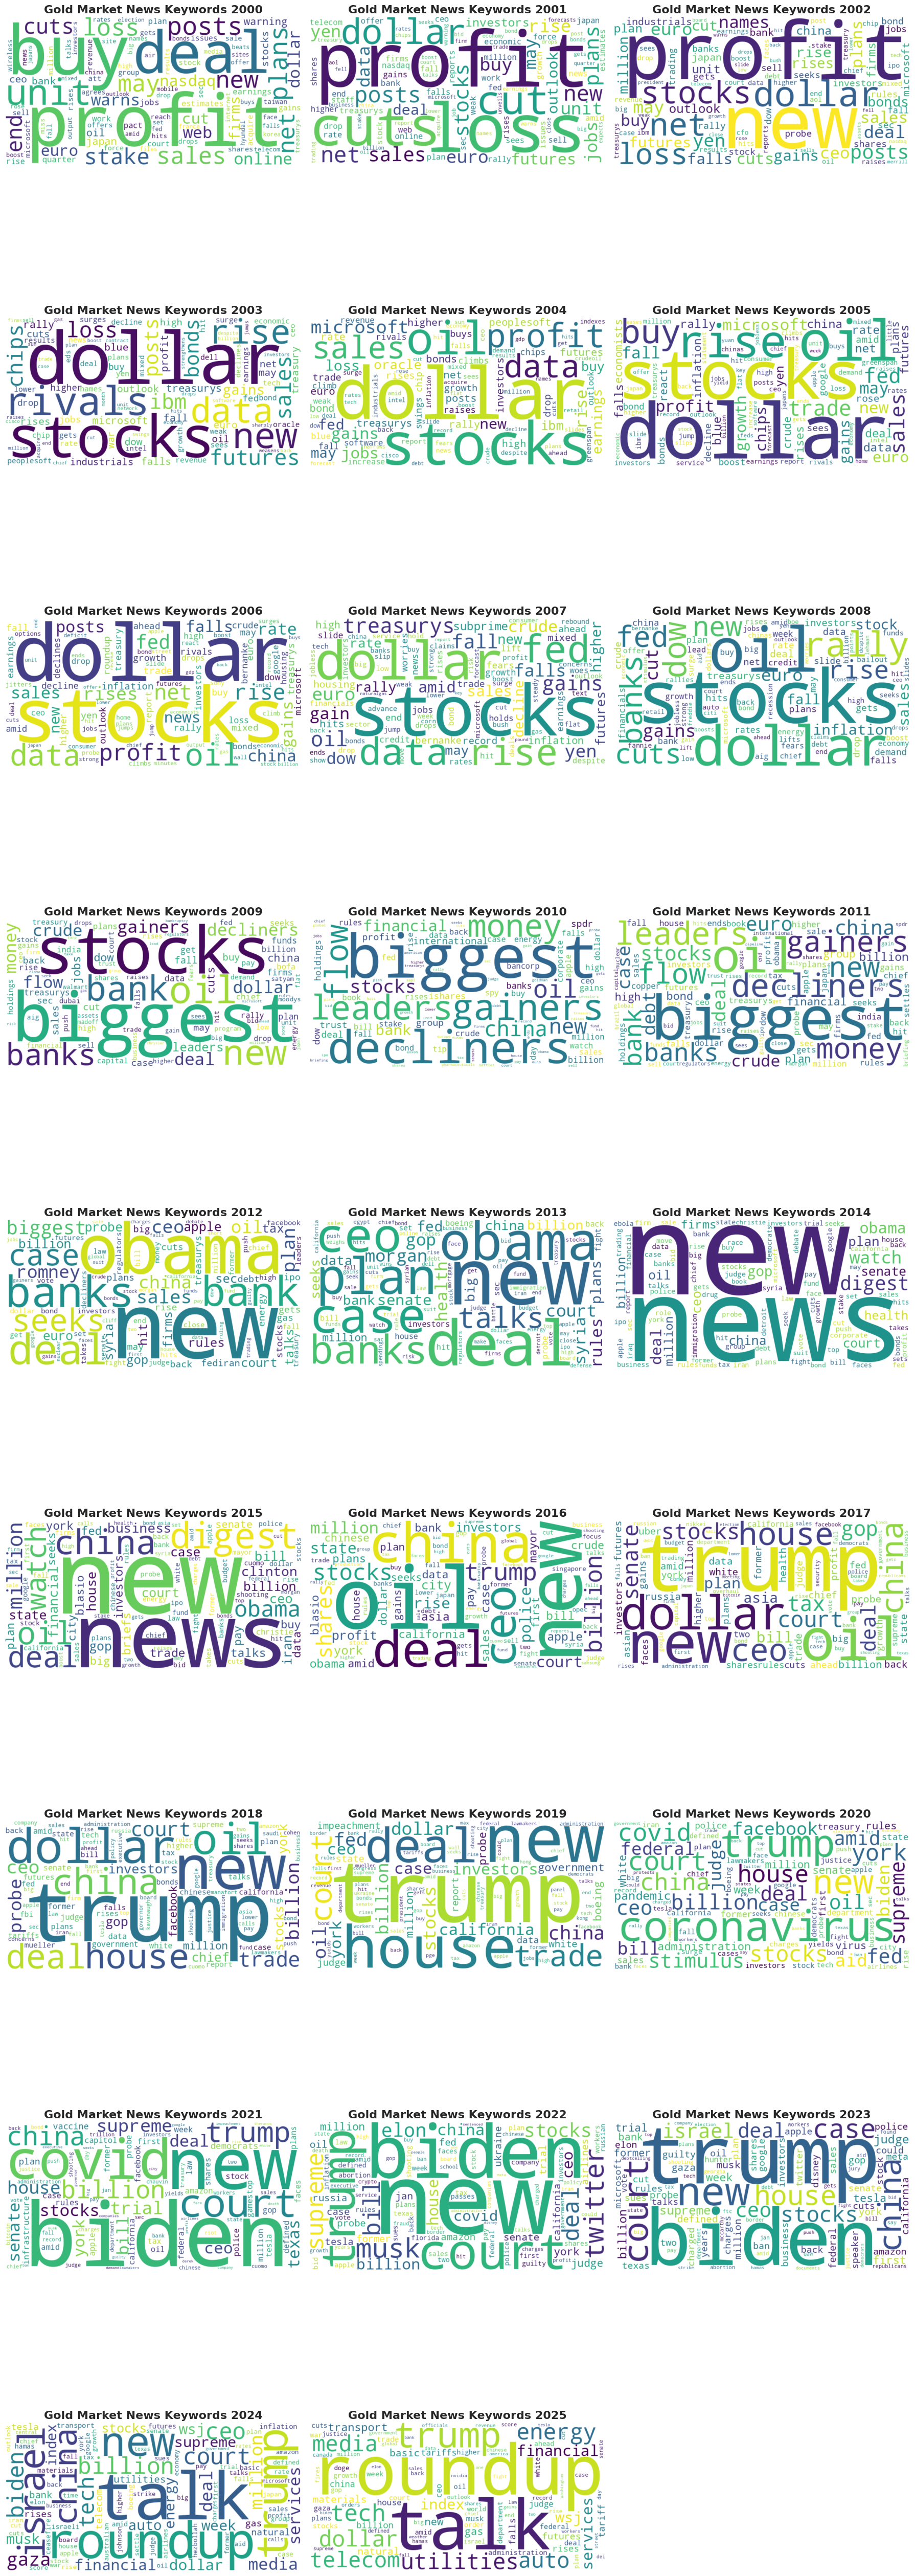


Top 5 Most Common Words by Year:
                 Rank 1           Rank 2           Rank 3         Rank 4  \
Year                                                                       
2000        profit (44)         buy (40)        deal (28)      unit (28)   
2001       profit (216)       loss (163)       cuts (148)      cut (141)   
2002       profit (217)        new (193)     dollar (191)      net (152)   
2003       dollar (200)     stocks (119)      rivals (65)       new (52)   
2004       dollar (181)     stocks (138)         oil (77)    profit (68)   
2005       dollar (173)     stocks (134)         oil (91)      rise (63)   
2006       dollar (173)     stocks (164)         oil (98)      data (95)   
2007       stocks (215)     dollar (112)         fed (49)      data (47)   
2008       stocks (117)         oil (78)      dollar (69)     rally (43)   
2009       biggest (63)      stocks (58)         oil (55)       new (47)   
2010      biggest (565)  decliners (287)    gainers (2

In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import Counter
from matplotlib.gridspec import GridSpec

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Text preprocessing function
def preprocess_text(text):
    """
    Preprocess text: lowercase, remove special characters, tokenize, remove stopwords
    """
    if not isinstance(text, str):
        return []

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Simple tokenization - avoid using word_tokenize
    tokens = text.split()

    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    additional_stopwords = {'gold', 'price', 'prices', 'market', 'markets', 'says', 'said', 'year'}
    stop_words.update(additional_stopwords)
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    return filtered_tokens

# Generate word clouds by year and create comparison table
def generate_yearly_wordclouds_with_table(df):
    """
    Generate word clouds for headlines by year and display a comparison table
    """
    # Ensure index is datetime type
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # Extract year
    df['year'] = df.index.year

    # Group by year
    year_groups = df.groupby('year')

    # Variables to store yearly data
    years = []
    yearly_wordclouds = {}
    yearly_top_words = {}

    # Process headlines for each year
    for year, group in year_groups:
        print(f"Processing data for year {year}...")
        years.append(year)

        # Combine all headlines
        all_headlines = ' / '.join(group['headlines'].dropna().astype(str))

        # Preprocess text
        tokens = preprocess_text(all_headlines)

        # Skip if not enough words
        if len(tokens) < 10:
            print(f"Not enough words to generate word cloud for year {year}")
            continue

        # Count word frequencies
        word_freq = Counter(tokens)

        # Generate word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            max_words=100,
            colormap='viridis',
            contour_width=1,
            contour_color='steelblue'
        ).generate_from_frequencies(word_freq)

        # Store wordcloud and top 5 words
        yearly_wordclouds[year] = wordcloud
        yearly_top_words[year] = word_freq.most_common(5)

        # Save individual wordcloud image
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Gold Market News Keywords {year}', fontsize=20, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(f'gold_news_wordcloud_{year}.png', dpi=300, bbox_inches='tight')
        plt.close()

    # Sort years chronologically
    years.sort()

    # Display word clouds in a grid layout
    # Calculate grid dimensions
    n_years = len(years)
    n_cols = 3  # Set number of columns
    n_rows = (n_years + n_cols - 1) // n_cols  # Calculate number of rows needed

    # Create subplots
    fig = plt.figure(figsize=(18, 6 * n_rows))
    gs = GridSpec(n_rows, n_cols, figure=fig)

    for i, year in enumerate(years):
        if year not in yearly_wordclouds:
            continue

        row, col = i // n_cols, i % n_cols
        ax = fig.add_subplot(gs[row, col])
        ax.imshow(yearly_wordclouds[year], interpolation='bilinear')
        ax.set_title(f'Gold Market News Keywords {year}', fontsize=16, fontweight='bold')
        ax.axis('off')

    plt.tight_layout()
    plt.savefig('yearly_wordclouds_grid.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Create a comparison table of the top 5 words for each year
    top_words_data = {}
    for year in years:
        if year not in yearly_top_words:
            continue

        # Format top words as "word (count)"
        year_words = [f"{word} ({count})" for word, count in yearly_top_words[year]]
        # Make sure we have exactly 5 entries for each year
        while len(year_words) < 5:
            year_words.append("-")

        top_words_data[year] = year_words

    # Create DataFrame for display
    comparison_df = pd.DataFrame(top_words_data).T
    comparison_df.columns = [f"Rank {i+1}" for i in range(5)]
    comparison_df.index.name = "Year"

    print("\nTop 5 Most Common Words by Year:")
    print(comparison_df)

    # Display as a styled table
    styled_df = comparison_df.style.set_properties(**{
        'text-align': 'center',
        'font-weight': 'bold',
        'border-color': 'black',
        'border-style': 'solid',
        'border-width': '1px'
    })

    # Return the DataFrame for further analysis if needed
    return comparison_df

# Execute function to generate yearly word clouds and comparison table
top_words_comparison = generate_yearly_wordclouds_with_table(df)

## Gold Market News Keyword Analysis (2000-2025)

### Key Temporal Trends

- **Early 2000s (2000-2002)**: Financial performance terms dominated with "profit" consistently ranking #1, indicating a focus on company results during the dot-com aftermath.

- **Dollar Era (2003-2006)**: "Dollar" emerged as the most frequent term, reflecting growing concerns about currency movements and their impact on gold pricing.

- **Financial Crisis Period (2007-2009)**: "Stocks" became prominent, joined by crisis-related terms like "rally" and "biggest", marking the market turbulence of the Great Recession.

- **Post-Crisis Recovery (2010-2011)**: Market performance indicators increased dramatically with "biggest", "decliners", "gainers" and "leaders" dominating discourse, signaling heightened market tracking.

- **Political Shift (2012-2016)**: Broader economic topics like "new", "deal", and "Obama" emerged, with "China" appearing in 2015-2016, indicating geopolitical focus.

- **Trump Administration (2017-2020)**: "Trump" became the dominant keyword, reflecting the market's fixation on administration policies affecting gold prices.

- **Pandemic Impact (2020-2021)**: "Coronavirus" and "Covid" entered the top keywords, highlighting the pandemic's unprecedented market influence.

- **Recent Years (2022-2025)**: Political terms remain strong ("Trump", "Biden") with newer topics like "roundup", "talk", and "tech" rising in importance.


## 黄金市场新闻关键词分析（2000-2025）

### 关键时间趋势

- **2000年代初期 (2000-2002)**: 财务绩效术语占主导地位，"profit"（利润）持续排名第一，表明在互联网泡沫后市场关注公司业绩。

- **美元时代 (2003-2006)**: "dollar"（美元）成为最频繁出现的词汇，反映出对货币变动及其对黄金定价影响的日益关注。

- **金融危机时期 (2007-2009)**: "stocks"（股票）变得突出，伴随着"rally"（反弹）和"biggest"（最大）等危机相关术语，标志着大萧条期间的市场动荡。

- **危机后复苏 (2010-2011)**: 市场表现指标剧增，"biggest"（最大）、"decliners"（下跌者）、"gainers"（上涨者）和"leaders"（领先者）主导市场讨论，表明市场跟踪活动加强。

- **政治转变 (2012-2016)**: 更广泛的经济话题如"new"（新）、"deal"（交易）和"Obama"（奥巴马）浮现，2015-2016年"China"（中国）开始出现，表明地缘政治关注点。

- **特朗普政府 (2017-2020)**: "Trump"（特朗普）成为主导关键词，反映市场对影响黄金价格的政府政策的关注。

- **疫情影响 (2020-2021)**: "coronavirus"（冠状病毒）和"Covid"（新冠）进入关键词排行榜，凸显疫情对市场的前所未有影响。

- **近年趋势 (2022-2025)**: 政治术语保持强势（"Trump"、"Biden"），同时新话题如"roundup"（综述）、"talk"（谈话）和"tech"（科技）重要性提升。

# 5.Financial News Headline Sentiment Analysis Implementation

## 1. Technical Architecture & Model

- **Model Selection**: Utilized FinBERT model, specialized for financial text and fine-tuned from BERT
- **Framework**: Implemented with PyTorch and Hugging Face Transformers library
- **Hardware Acceleration**: Configured to prioritize GPU (CUDA) with automatic CPU fallback

## 2. Sentiment Analysis Core Functions

- **Single Text Analysis** (`analyze_with_finbert`):
  - Tokenizes input text with maximum length of 512 tokens
  - Predicts probabilities for three sentiment classes: positive, neutral, negative
  - Calculates polarity score (positive_prob - negative_prob)
  - Returns complete probability distribution and predicted label (0=negative, 1=neutral, 2=positive)

- **Batch Headline Analysis** (`analyze_headlines_with_finbert`):
  - Processes daily headline collections, splitting multiple headlines by "/"
  - Analyzes sentiment of each headline individually and computes daily average polarity
  - Counts positive, neutral, and negative headlines per day and their percentages
  - Outputs progress every 100 records to monitor long-running process

## 3. Feature Engineering

- **Added Feature Columns**:
  - `avg_polarity`: Average sentiment polarity across all headlines
  - `headline_count`: Total number of headlines per day
  - `positive/neutral/negative_headlines`: Count of headlines in each sentiment category
  - `pct_positive/neutral/negative`: Percentage of headlines in each sentiment category

## 4. Visualization Analysis

- **Sentiment Distribution Analysis**:
  - Pie chart showing proportion of positive, neutral, and negative headlines in the dataset
  - Bar chart comparing absolute counts of the three sentiment categories

- **Time Series Visualization**:
  - Yearly average sentiment polarity trend plot to observe long-term sentiment changes
  - Dual Y-axis chart series showing correlation between sentiment and market metrics:
    - Monthly closing price vs. monthly average sentiment polarity
    - Quarterly average daily returns vs. quarterly average sentiment polarity
    - Quarterly average trading volume vs. quarterly average sentiment polarity


# 5.金融新闻标题情感分析实现

## 1. 技术架构与模型

- **模型选择**: 使用金融领域专用的 FinBERT 模型，基于 BERT 在金融文本上微调
- **框架**: 基于 PyTorch 和 Hugging Face Transformers 库实现
- **硬件加速**: 设置为优先使用 GPU (CUDA)，无 GPU 时自动回退到 CPU

## 2. 情感分析核心功能

- **单文本分析** (`analyze_with_finbert`):
  - 对输入文本进行分词，限制最大长度为 512 个标记
  - 使用 FinBERT 预测三类情感概率：积极、中性、消极
  - 计算情感极性分数 (positive_prob - negative_prob)
  - 返回完整概率分布及预测标签 (0=消极, 1=中性, 2=积极)

- **批量标题分析** (`analyze_headlines_with_finbert`):
  - 处理每日标题集合，以 "/" 分隔多个标题
  - 单独分析每条标题的情感，并计算当日平均极性
  - 统计每日积极、中性、消极标题的数量和百分比
  - 每处理 100 条记录输出一次进度，便于监控长时间运行

## 3. 特征工程

- **新增特征列**:
  - `avg_polarity`: 所有标题的平均情感极性
  - `headline_count`: 每日标题总数
  - `positive/neutral/negative_headlines`: 各类情感标题计数
  - `pct_positive/neutral/negative`: 各类情感标题百分比

## 4. 可视化分析

- **情感分布分析**:
  - 饼图显示积极、中性、消极标题在整个数据集中的占比
  - 条形图直观对比三类情感标题的绝对数量

- **时间序列可视化**:
  - 绘制年度平均情感极性趋势图，观察长期情感变化
  - 双Y轴图表系列，展示情感与市场指标的相关性:
    - 月度收盘价 vs. 月度平均情感极性
    - 季度平均日收益率 vs. 季度平均情感极性
    - 季度平均交易量 vs. 季度平均情感极性


In [ ]:
%pip install transformers torch

In [ ]:
# Imports and device selection
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Select GPU if available, else fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load FinBERT model and tokenizer onto the chosen device
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
model.to(device)
model.eval()


Using device: cuda
Loading FinBERT model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

Starting sentiment analysis on headlines...
Processed 100/6151
Processed 200/6151
Processed 300/6151
Processed 400/6151
Processed 500/6151
Processed 600/6151
Processed 700/6151
Processed 800/6151
Processed 900/6151
Processed 1000/6151
Processed 1100/6151
Processed 1200/6151
Processed 1300/6151
Processed 1400/6151
Processed 1500/6151
Processed 1600/6151
Processed 1700/6151
Processed 1800/6151
Processed 1900/6151
Processed 2000/6151
Processed 2100/6151
Processed 2200/6151
Processed 2300/6151
Processed 2400/6151
Processed 2500/6151
Processed 2600/6151
Processed 2700/6151
Processed 2800/6151
Processed 2900/6151
Processed 3000/6151
Processed 3100/6151
Processed 3200/6151
Processed 3300/6151
Processed 3400/6151
Processed 3500/6151
Processed 3600/6151
Processed 3700/6151
Processed 3800/6151
Processed 3900/6151
Processed 4000/6151
Processed 4100/6151
Processed 4200/6151
Processed 4300/6151
Processed 4400/6151
Processed 4500/6151
Processed 4600/6151
Processed 4700/6151
Processed 4800/6151
Proce

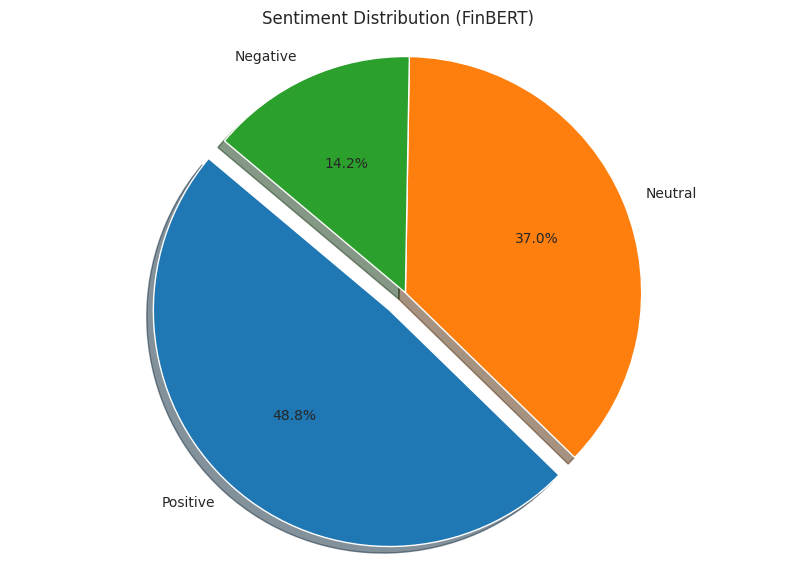

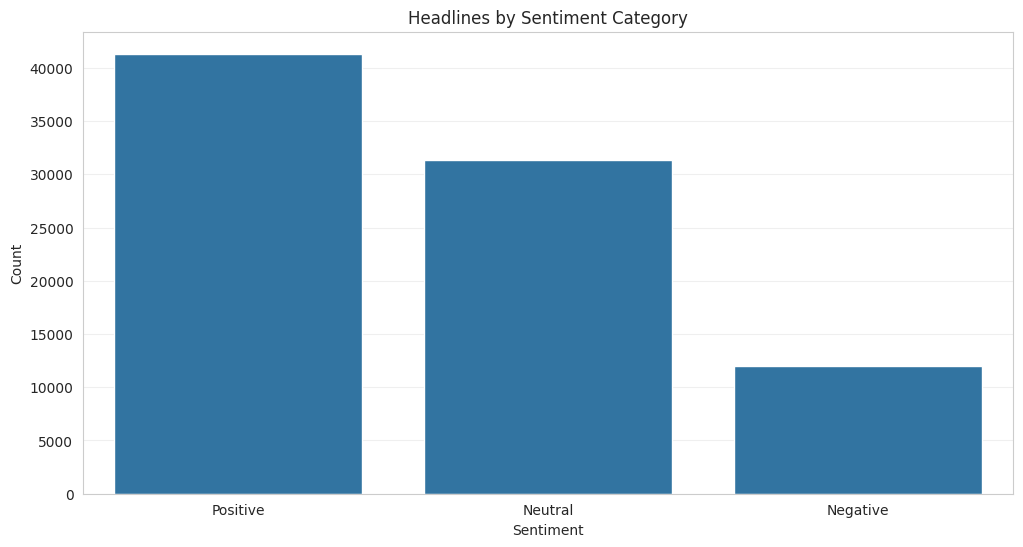

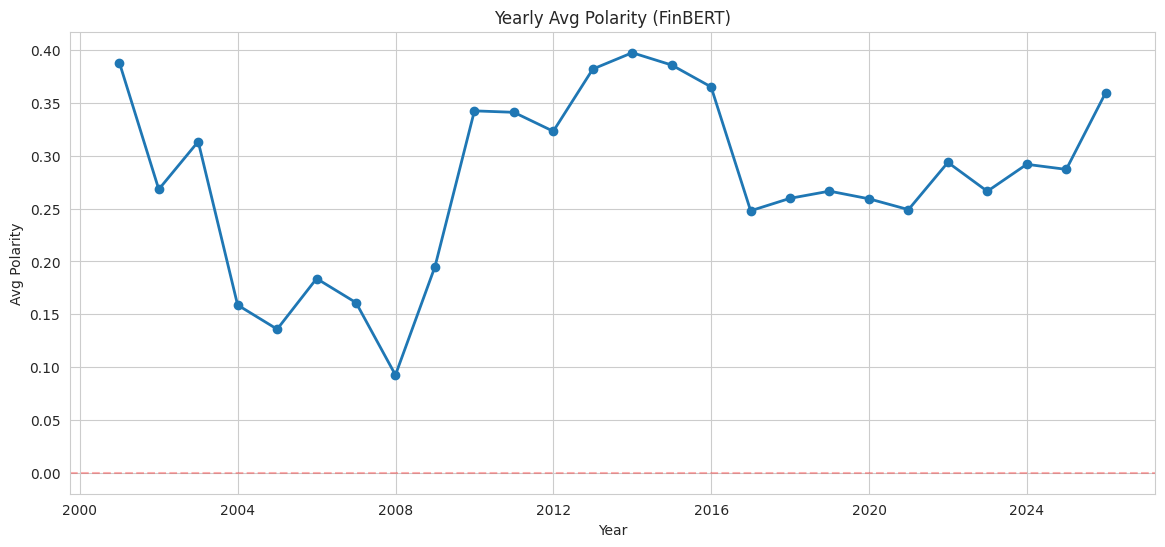

In [ ]:
# Define single-text analysis function
def analyze_with_finbert(text: str) -> dict:
    """
    Analyze a single text sentiment with FinBERT model.

    This function processes individual text segments (headlines) through the FinBERT model,
    which is specialized for financial text sentiment analysis. It handles tokenization,
    inference through the model, and post-processing of outputs.

    Args:
        text: The input text string to analyze (typically a headline)

    Returns:
        A dictionary containing:
        - polarity: sentiment score from -1 (negative) to 1 (positive)
        - positive_prob: probability of positive sentiment
        - neutral_prob: probability of neutral sentiment
        - negative_prob: probability of negative sentiment
        - sentiment_label: predicted class (0=negative, 1=neutral, 2=positive)
    """
    # Tokenize text for BERT model and move tensors to the same device as model (GPU/CPU)
    # Truncation ensures we don't exceed maximum context length (512)
    # Padding ensures consistent tensor dimensions
    inputs = tokenizer(
        text,
        return_tensors="pt",  # PyTorch tensors format
        padding=True,         # Add padding tokens if needed
        truncation=True,      # Truncate if exceeding max length
        max_length=512        # Maximum length in tokens (BERT limit)
    )
    # Move all input tensors to the proper device (GPU if available)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Disable gradient calculation for inference (saves memory and computation)
    with torch.no_grad():
        # Run the model to get raw logits
        outputs = model(**inputs)

    # Convert logits (raw scores) to probabilities via softmax function
    # Move results to CPU for numpy conversion and further processing
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1).cpu().numpy()[0]

    # Calculate polarity score: positive probability minus negative probability
    # This gives a score from -1 (fully negative) to 1 (fully positive)
    sentiment_score = float(probs[2] - probs[0])

    # Get the index of highest probability class as the predicted label
    predicted_label = int(np.argmax(probs))

    # Return comprehensive results dictionary with both scores and class probabilities
    return {
        "polarity":        sentiment_score,  # Custom score from -1 to 1
        "positive_prob":   float(probs[2]),  # Probability of positive sentiment
        "neutral_prob":    float(probs[1]),  # Probability of neutral sentiment
        "negative_prob":   float(probs[0]),  # Probability of negative sentiment
        "sentiment_label": predicted_label   # 0=negative, 1=neutral, 2=positive
    }

# Define batch-analysis and visualization functions
def analyze_headlines_with_finbert(df: pd.DataFrame, headline_col: str = "headlines") -> pd.DataFrame:
    """
    Analyze daily headlines sentiment using FinBERT.

    This function processes all headlines in a DataFrame, understanding that each record
    may contain multiple headlines separated by '/'. It analyzes each headline separately
    and then aggregates results at the daily level, creating new columns with sentiment metrics.

    Args:
        df: Input DataFrame containing headlines
        headline_col: Column name containing headline text (default: "headlines")

    Returns:
        DataFrame with additional sentiment columns:
        - avg_polarity: Average sentiment polarity score
        - headline_count: Number of headlines per day
        - positive/neutral/negative_headlines: Count by sentiment category
        - pct_positive/neutral/negative: Percentage by sentiment category
    """
    print("Starting sentiment analysis on headlines...")
    df_out = df.copy()  # Create a copy to avoid modifying the original

    # Initialize lists to store results for each row
    daily_polarity = []  # Average polarity score per day
    pos_counts     = []  # Count of positive headlines per day
    neu_counts     = []  # Count of neutral headlines per day
    neg_counts     = []  # Count of negative headlines per day
    total_counts   = []  # Total headlines per day

    # Process each row (typically representing one day)
    total = len(df_out)
    for i, (_, row) in enumerate(df_out.iterrows(), 1):
        # Show progress indicator every 100 rows or at completion
        if i % 100 == 0 or i == total:
            print(f"Processed {i}/{total}")

        # Get headline text from the specified column
        text = row.get(headline_col, "")

        # Handle missing/empty headlines
        if pd.isna(text) or not text.strip():
            daily_polarity.append(np.nan)
            pos_counts.append(0)
            neu_counts.append(0)
            neg_counts.append(0)
            total_counts.append(0)
            continue

        # Split combined headlines by '/' delimiter and clean each segment
        segments = [seg.strip() for seg in text.split("/") if seg.strip()]
        total_counts.append(len(segments))

        # Initialize counters for sentiment categories
        p_cnt = n_cnt = ng_cnt = 0  # positive, neutral, negative counts
        scores = []                 # list to store polarity scores

        # Process each headline segment individually
        for seg in segments:
            # Get sentiment analysis results for this headline
            res = analyze_with_finbert(seg)
            scores.append(res["polarity"])

            # Count headlines by predicted sentiment class
            if   res["sentiment_label"] == 2: p_cnt += 1   # Positive
            elif res["sentiment_label"] == 1: n_cnt += 1   # Neutral
            else:                             ng_cnt += 1  # Negative

        # Store the daily average polarity and sentiment counts
        daily_polarity.append(float(np.mean(scores)) if scores else np.nan)
        pos_counts.append(p_cnt)
        neu_counts.append(n_cnt)
        neg_counts.append(ng_cnt)

    # Add new columns to the output DataFrame
    df_out["avg_polarity"]       = daily_polarity       # Average sentiment score
    df_out["headline_count"]     = total_counts         # Total headlines per day
    df_out["positive_headlines"] = pos_counts           # Count of positive headlines
    df_out["neutral_headlines"]  = neu_counts           # Count of neutral headlines
    df_out["negative_headlines"] = neg_counts           # Count of negative headlines

    # Calculate percentage features (relative frequency of each sentiment)
    # Handle division by zero with vectorized operations
    df_out["pct_positive"] = df_out["positive_headlines"] / df_out["headline_count"] * 100
    df_out["pct_neutral"]  = df_out["neutral_headlines"]  / df_out["headline_count"] * 100
    df_out["pct_negative"] = df_out["negative_headlines"] / df_out["headline_count"] * 100

    print("Sentiment analysis completed.")
    return df_out

def visualize_sentiment_distribution(df: pd.DataFrame):
    """
    Plot pie and bar charts of sentiment category counts.

    Creates two visualizations:
    1. A pie chart showing the proportion of positive, neutral, and negative headlines
    2. A bar chart showing the raw counts of headlines in each sentiment category

    Args:
        df: DataFrame containing sentiment analysis results with headline count columns
    """
    # Calculate total counts for each sentiment category across all days
    total_pos = df["positive_headlines"].sum()
    total_neu = df["neutral_headlines"].sum()
    total_neg = df["negative_headlines"].sum()

    # Prepare data for visualization
    labels = ["Positive", "Neutral", "Negative"]
    sizes  = [total_pos, total_neu, total_neg]
    explode = (0.1, 0, 0)  # Explode the positive slice for emphasis

    # Create pie chart
    plt.figure(figsize=(10, 7))
    plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%",
            shadow=True, startangle=140)
    plt.axis("equal")  # Equal aspect ratio ensures the pie is circular
    plt.title("Sentiment Distribution (FinBERT)")
    plt.show()

    # Create bar chart for comparing absolute counts
    plt.figure(figsize=(12, 6))
    sns.barplot(x=labels, y=sizes)
    plt.title("Headlines by Sentiment Category")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.grid(axis="y", alpha=0.3)  # Add light horizontal grid lines
    plt.show()

def visualize_yearly_polarity_trend(df: pd.DataFrame):
    """
    Plot yearly average polarity trend.

    Creates a time series visualization showing how the average sentiment polarity
    has changed year by year throughout the dataset period.

    Args:
        df: DataFrame containing sentiment analysis results with 'avg_polarity' column
    """
    # Create a copy to avoid modifying the original
    df2 = df.copy()

    # Ensure DataFrame has a datetime index for time-based operations
    # If not, set the timestamp column as index if available
    if not isinstance(df2.index, pd.DatetimeIndex) and "timestamp" in df2.columns:
        df2 = df2.set_index("timestamp")

    # Resample data to yearly frequency, calculating mean polarity per year
    # 'A' means annual frequency, ending at year end
    yearly = df2["avg_polarity"].resample("A").mean()

    # Create time series plot
    plt.figure(figsize=(14, 6))
    plt.plot(yearly.index, yearly.values, marker="o", linewidth=2)
    plt.axhline(0, color="r", linestyle="--", alpha=0.3)  # Add reference line at y=0
    plt.title("Yearly Avg Polarity (FinBERT)")
    plt.xlabel("Year")
    plt.ylabel("Avg Polarity")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # Format x-axis as years
    plt.show()

# Run the complete sentiment analysis pipeline on the dataset
# Process all headlines, calculate sentiment metrics, and create visualizations
df_sent = analyze_headlines_with_finbert(df, headline_col="headlines")
visualize_sentiment_distribution(df_sent)
visualize_yearly_polarity_trend(df_sent)

# Save the enriched dataset with sentiment features for future use
df_sent.to_csv("gold_data_with_finbert_sentiment.csv", index=False)

## Gold Market News Sentiment Analysis Results

### Sentiment Distribution Overview

- **Positive Sentiment Dominance**: 48.8% of headlines exhibit positive sentiment
- **Substantial Neutral Coverage**: 37.0% of headlines are classified as neutral
- **Limited Negative Sentiment**: Only 14.2% of headlines show negative sentiment

### Headline Count by Sentiment Category

- **Volume Distribution**: The absolute counts (approximately 41,000 positive, 31,000 neutral, and 12,000 negative headlines)

### Temporal Polarity Trends (2000-2025)

- **Consistent Positive Sentiment**: The yearly average polarity remains above zero throughout the entire 25-year period, confirming persistent positive sentiment.
- **Volatility Periods**:
  - **2004-2008**: Sharp decline in sentiment reaching the lowest point around 2008 (0.09), coinciding with the global financial crisis.
  - **2008-2013**: Rapid recovery and stabilization at higher polarity levels (~0.34).
  - **2013-2015**: Peak positive sentiment period (~0.40), corresponding to post-crisis stabilization.
  - **2016-2017**: Significant drop to around 0.25, possibly reflecting uncertainty.
  - **2017-2023**: Relatively stable but subdued period (0.25-0.30).
  - **2023-2025**: Recent upward trend reaching 0.36, suggesting increasing optimism.

### Key Insights

1. Gold market news consistently maintains positive sentiment bias even during global financial downturns.
2. Major economic events (like the 2008 crisis) are clearly reflected in sentiment fluctuations, but never push the overall sentiment into negative territory.
3. The recent upward trend in sentiment polarity (2023-2025) may indicate growing market confidence in gold as an investment.
4. The high proportion of neutral coverage (37%) demonstrates significant balanced reporting alongside the positive bias.


## 黄金市场新闻情感分析结果

### 情感分布概览

- **积极情感占主导**: 48.8% 的标题表现出积极情感
- **大量中性报道**: 37.0% 的标题被归类为中性
- **有限的负面情感**: 仅 14.2% 的标题显示负面情感

### 各情感类别标题计数

- **数量分布**: 绝对数量（约 41,000 条积极、31,000 条中性和 12,000 条负面标题）

### 时间极性趋势（2000-2025）

- **持续积极情感**: 年度平均极性在整个 25 年期间始终保持在零以上，确认了持续的积极情感。
- **波动期**:
  - **2004-2008 年**: 情感急剧下降，在 2008 年左右触及最低点(0.09)，与全球金融危机吻合。
  - **2008-2013 年**: 快速恢复并稳定在较高极性水平(~0.34)。
  - **2013-2015 年**: 积极情感高峰期(~0.40)，对应危机后稳定阶段。
  - **2016-2017 年**: 显著下降至 0.25 左右，可能反映不确定性。
  - **2017-2023 年**: 相对稳定但较为平缓的时期(0.25-0.30)。
  - **2023-2025 年**: 近期上升趋势达到 0.36，暗示乐观情绪增加。

### 关键洞察

1. 即使在全球金融下行期间，黄金市场新闻也持续保持积极情感偏向。
2. 重大经济事件（如 2008 年危机）在情感波动中清晰反映，但从未将整体情感推向负面区域。
3. 近期情感极性上升趋势（2023-2025 年）可能表明市场对黄金作为投资的信心增强。
4. 高比例的中性报道（37%）表明在积极偏向的同时存在大量平衡报道。



## Dual-Axis Visualization Analysis of Gold Market Metrics and Sentiment Polarity

This code implements an advanced visualization framework to explore the temporal relationship between gold market metrics and news headline sentiment polarity, encompassing these key elements:

### 1. Data Preparation and Resampling

- **Index Standardization**: Ensures the dataset uses a datetime index, laying the foundation for time series operations
- **Multi-scale Aggregation**:
  - Price data: Aggregated monthly (`'M'`), providing finer granularity of price trends
  - Returns and trading volume: Aggregated quarterly (`'Q'`), smoothing short-term fluctuations to highlight medium-term trends
- **Feature Renaming**: Creates descriptive names for each aggregated metric, enhancing readability

### 2. Dual Y-Axis Visualization Design

Creates three sets of dual Y-axis charts, each comparing a market metric against sentiment polarity:

1. **Monthly Closing Price vs. Sentiment Polarity**:
   - Left axis (blue): Shows monthly average gold closing price
   - Right axis (orange): Shows corresponding monthly average sentiment polarity
   - X-axis optimization: Displays ticks every 6 months in year-month format

2. **Quarterly Average Daily Returns vs. Sentiment Polarity**:
   - Left axis (blue): Presents quarterly average daily returns
   - Right axis (orange): Presents quarterly average sentiment polarity
   - Uses auto date locator for optimal tick spacing

3. **Quarterly Average Trading Volume vs. Sentiment Polarity**:
   - Left axis (green): Depicts quarterly average trading volume
   - Right axis (orange): Depicts quarterly average sentiment polarity
   - Maintains consistent date formatting with other charts

### 3. Analytical Value

This visualization design effectively reveals:

- Potential correlations between gold price trends and market sentiment
- Whether sentiment changes lead or lag price/return/volume changes
- Possible relationships between sentiment polarity strength and market volatility
- Differences in sensitivity of various market metrics to sentiment changes

Through these intuitive comparisons, analysts can discover market sentiment drivers potentially overlooked by traditional technical analysis, providing complementary perspectives for investment decisions.

## 黄金市场指标与情感极性的双轴可视化分析

该代码用于探索黄金市场指标与新闻标题情感极性之间的时间关系，主要包含以下关键环节：

### 1. 数据准备与重采样

- **索引标准化**：确保数据集使用日期时间索引，为时间序列操作奠定基础
- **多尺度聚合**：
  - 价格数据：按月（`'M'`）聚合，提供较细粒度的价格趋势
  - 收益率与交易量：按季度（`'Q'`）聚合，平滑短期波动，突出中期趋势
- **特征重命名**：为各聚合指标创建清晰描述性名称，增强可读性

### 2. 双Y轴可视化设计

创建三组双Y轴图表，每组展示一个市场指标与情感极性的对比：

1. **月度收盘价 vs. 情感极性**：
   - 左轴（蓝色）：显示黄金月平均收盘价
   - 右轴（橙色）：显示对应月份的平均情感极性
   - X轴优化：每6个月显示一个刻度，采用年-月格式

2. **季度平均日收益率 vs. 情感极性**：
   - 左轴（蓝色）：展示季度平均日收益率
   - 右轴（橙色）：展示季度平均情感极性
   - 采用自动日期定位器确保最佳刻度间隔

3. **季度平均交易量 vs. 情感极性**：
   - 左轴（绿色）：呈现季度平均交易量
   - 右轴（橙色）：呈现季度平均情感极性
   - 保持与其他图表一致的日期格式

### 3. 分析价值

这组可视化设计特别有效地揭示了：

- 黄金价格走势与市场情感的潜在相关性
- 情感变化是否领先或滞后于价格/收益率/交易量变化
- 情感极性强度与市场波动性之间可能存在的关系
- 不同市场指标对情感变化的敏感度差异


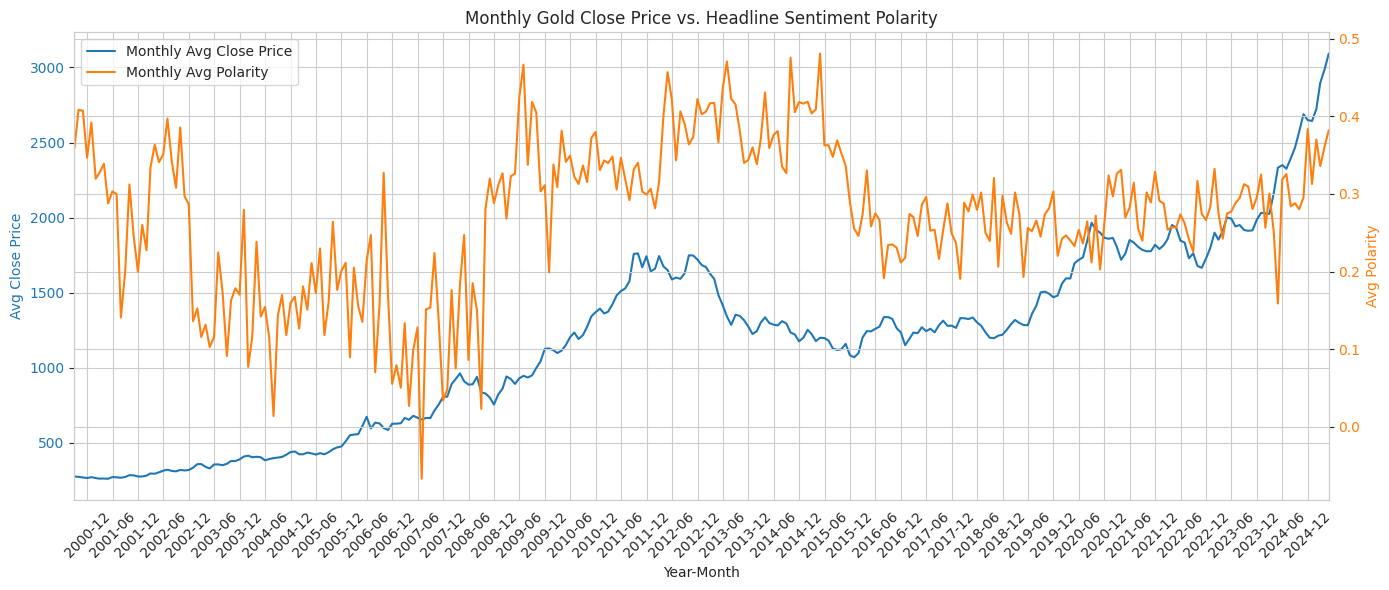

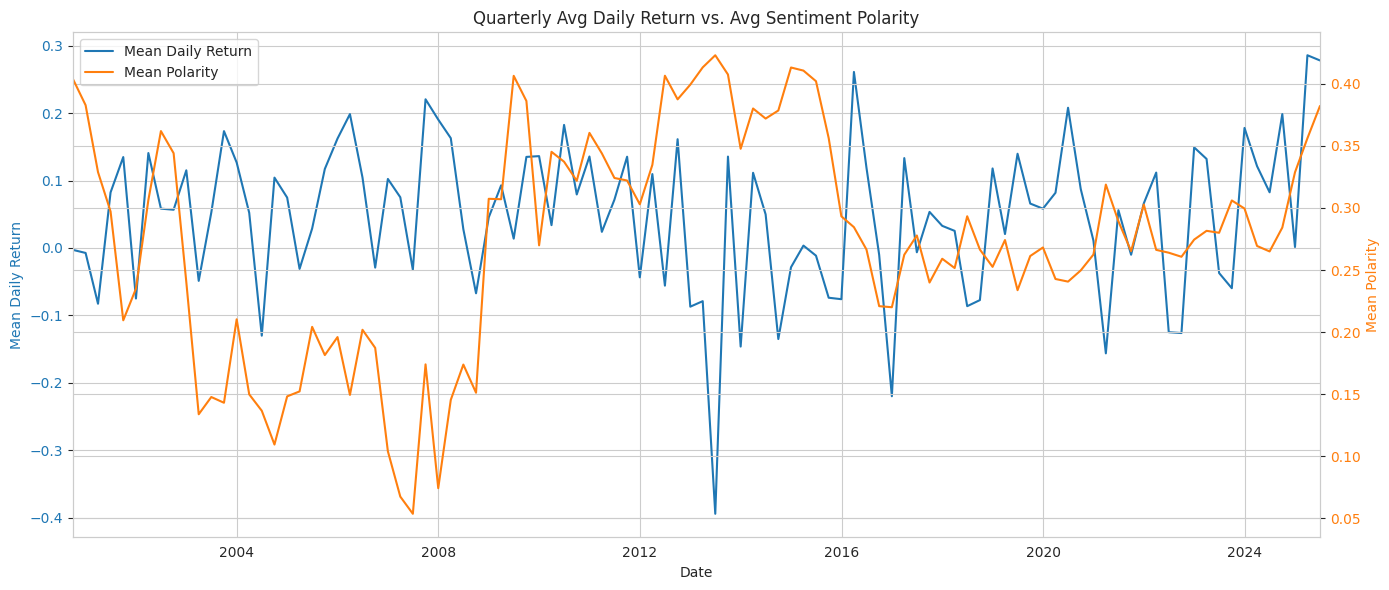

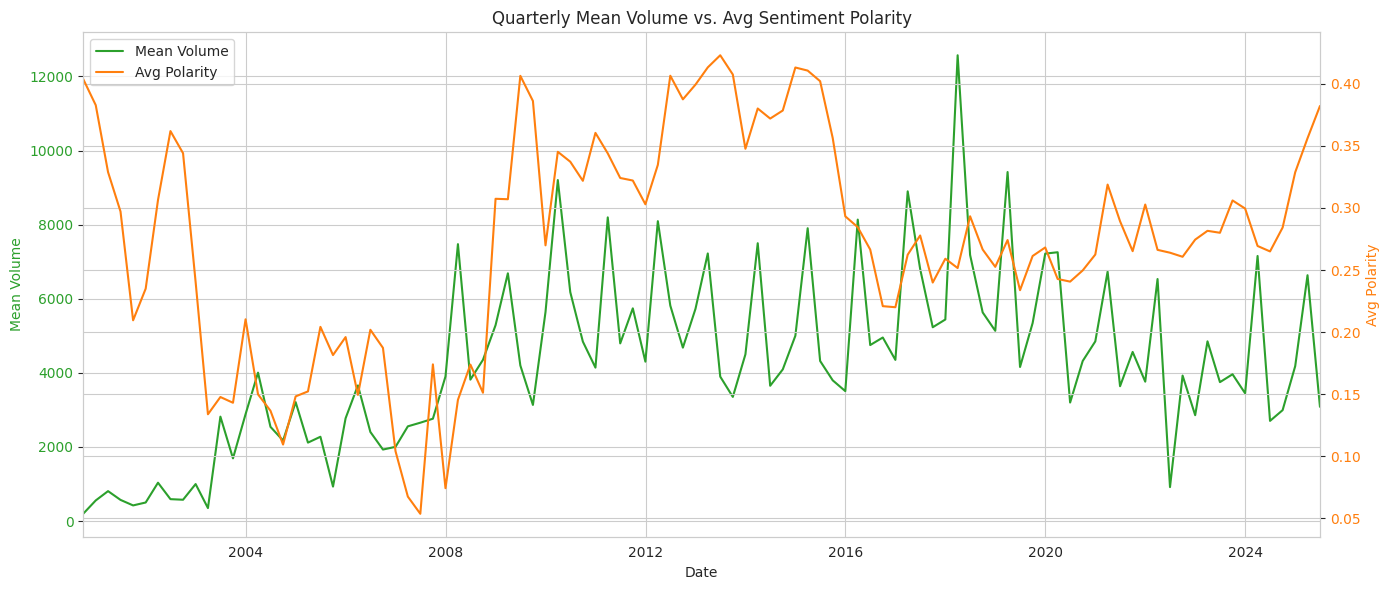

In [ ]:
# Dual‐axis plots for gold metrics (price, return, volume) vs. sentiment polarity
# This code creates three dual-axis visualizations showing the relationship between
# different gold market metrics and sentiment polarity over time

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter

# 1. Ensure 'timestamp' is the index
# Convert the timestamp column to a datetime index if it isn't already
# This is essential for time-based operations like resampling
if not isinstance(df_sent.index, pd.DatetimeIndex):
    df_sent = df_sent.set_index('timestamp')

# 2. Define aggregation frequencies
# We use different frequencies for price (monthly) vs return/volume (quarterly)
# to optimize data granularity based on the nature of each metric
price_freq = 'M'   # 'M' for monthly aggregation of price (finer granularity)
other_freq = 'Q'   # 'Q' for quarterly aggregation of return and volume (smoothed view)

# 3. Prepare aggregated DataFrames
# For each metric, we resample the data to desired frequency and calculate means
# We also rename columns for clarity in the visualization

# Price DataFrame - Monthly aggregation
df_price = (
    df_sent
    .resample(price_freq)    # Group by month
    .agg({'close': 'mean', 'avg_polarity': 'mean'})  # Calculate average values
    .rename(columns={
        'close': 'monthly_close_price',       # Rename for clarity
        'avg_polarity': 'monthly_avg_polarity'
    })
)

# Return DataFrame - Quarterly aggregation
df_return = (
    df_sent
    .resample(other_freq)    # Group by quarter
    .agg({'daily_return': 'mean', 'avg_polarity': 'mean'})
    .rename(columns={
        'daily_return': 'mean_return',
        'avg_polarity': 'mean_polarity'
    })
)

# Volume DataFrame - Quarterly aggregation
df_volume = (
    df_sent
    .resample(other_freq)    # Group by quarter
    .agg({'volume': 'mean', 'avg_polarity': 'mean'})
    .rename(columns={
        'volume': 'mean_volume',
        'avg_polarity': 'mean_polarity'
    })
)

# 4. Plot 1: Monthly Avg Close Price vs. Avg Polarity
# This plot compares gold price trends with sentiment polarity at monthly granularity
fig, ax1 = plt.subplots(figsize=(14, 6))  # Create figure with specified size

# Primary Y-axis: Gold price
ax1.plot(
    df_price.index,                  # X-axis: dates
    df_price['monthly_close_price'], # Y-axis: price
    color='tab:blue',                # Blue line for price
    linewidth=1.5,                   # Line thickness
    label='Monthly Avg Close Price'  # Label for legend
)
ax1.set_xlabel('Year-Month')                # X-axis label
ax1.set_ylabel('Avg Close Price', color='tab:blue')  # Y-axis label with color
ax1.tick_params(axis='y', labelcolor='tab:blue')     # Y-tick color matching line
ax1.set_xlim(df_price.index.min(), df_price.index.max())  # Set x-axis range

# Format X-axis dates to show every 6 months with year-month format
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)  # Rotate dates for better readability

# Secondary Y-axis: Sentiment polarity
ax2 = ax1.twinx()  # Create twin axis sharing the same x-axis
ax2.plot(
    df_price.index,
    df_price['monthly_avg_polarity'],
    color='tab:orange',             # Orange for sentiment
    linewidth=1.5,
    label='Monthly Avg Polarity'
)
ax2.set_ylabel('Avg Polarity', color='tab:orange')  # Secondary y-axis label
ax2.tick_params(axis='y', labelcolor='tab:orange')  # Match tick color to line

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Monthly Gold Close Price vs. Headline Sentiment Polarity')
plt.tight_layout()  # Adjust spacing for better appearance
plt.show()


# 5. Plot 2: Quarterly Avg Daily Return vs. Mean Polarity
# This visualization examines the relationship between gold returns and sentiment
fig, ax1 = plt.subplots(figsize=(14, 6))

# Primary Y-axis: Mean daily return
ax1.plot(
    df_return.index, df_return['mean_return'],
    color='tab:blue',
    linewidth=1.5,
    label='Mean Daily Return'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Daily Return', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlim(df_return.index.min(), df_return.index.max())

# Use automatic date locator for optimal date spacing
# ConciseDateFormatter automatically creates a compact date representation
locator = AutoDateLocator()
formatter = ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

# Secondary Y-axis: Mean sentiment polarity
ax2 = ax1.twinx()
ax2.plot(
    df_return.index, df_return['mean_polarity'],
    color='tab:orange',
    linewidth=1.5,
    label='Mean Polarity'
)
ax2.set_ylabel('Mean Polarity', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

plt.title('Quarterly Avg Daily Return vs. Avg Sentiment Polarity')
plt.tight_layout()
plt.show()


# 6. Plot 3: Quarterly Mean Volume vs. Avg Polarity
# This visualization examines trading volume in relation to sentiment
fig, ax1 = plt.subplots(figsize=(14, 6))

# Primary Y-axis: Mean trading volume
ax1.plot(
    df_volume.index, df_volume['mean_volume'],
    color='tab:green',      # Green for volume
    linewidth=1.5,
    label='Mean Volume'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Volume', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')
ax1.set_xlim(df_volume.index.min(), df_volume.index.max())

# Use the same date formatting as the previous plot for consistency
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

# Secondary Y-axis: Average sentiment polarity (same as other plots)
ax2 = ax1.twinx()
ax2.plot(
    df_volume.index, df_volume['mean_polarity'],
    color='tab:orange',
    linewidth=1.5,
    label='Avg Polarity'
)
ax2.set_ylabel('Avg Polarity', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

plt.title('Quarterly Mean Volume vs. Avg Sentiment Polarity')
plt.tight_layout()
plt.show()

## Gold Market Metrics and Sentiment Polarity Relationship Analysis

### 1. Gold Closing Price and Sentiment Polarity (Monthly Data)

- **Long-term Price Trend**: Gold price gradually increased from around 300 in 2000 to over 3000 by 2024, with several distinct growth phases.
- **Sentiment Fluctuation Pattern**: Sentiment polarity consistently remained positive (0.05-0.45), indicating generally optimistic media coverage of gold.
- **Key Observations**:
  - Significant sentiment volatility during the 2008-2009 financial crisis, followed by accelerated gold price increases.
  - Sentiment polarity peaked (0.40-0.45) in 2011-2013, coinciding with a historical price high zone.
  - Lower sentiment levels (0.20-0.30) in 2016-2018 corresponded with relatively stable gold prices.
  - Sentiment strengthened again in 2023-2024 as gold prices reached all-time highs.

### 2. Daily Returns and Sentiment Polarity (Quarterly Data)

- **Return Characteristics**: Gold daily returns fluctuated between -0.4% and 0.3%, displaying high short-term volatility.
- **Correlation Observations**:
  - Increased return volatility when sentiment polarity bottomed (0.05) in 2008.
  - Relatively stable returns around the sentiment polarity peak period (0.40+) in 2013.
  - Coincidence of significant return decline (-0.4%) and sentiment drop in 2016.
  - Both sentiment polarity and returns showed high volatility during 2020-2024 but without clear synchronization patterns.

### 3. Trading Volume and Sentiment Polarity (Quarterly Data)

- **Volume Evolution**:
  - Extremely low volume (below 1000) from 2000-2004.
  - Gradual increase (2000-4000) from 2004-2008.
  - Sustained medium-high levels (4000-8000) with occasional peaks from 2009-2016.
  - Anomalous spike (12000+) in 2017.
  - Fluctuation between 3000-8000 from 2018-2024.
- **Relationship Observations**:
  - Steady volume increases followed the 2007-2008 sentiment trough.
  - Consistently high volumes during the high sentiment period of 2012-2016.
  - Volume peak (2017) coincided with declining sentiment, potentially indicating increased market uncertainty.

### Overall Conclusions

- Sentiment polarity generally displays leading indicator characteristics, with sentiment shifts often preceding significant price movements.
- Extreme sentiment values (peaks or troughs) typically relate to market turning points and may serve as potential warning signals.
- Price and sentiment polarity show medium-to-long-term coordination, while short-term returns exhibit less clear sentiment relationships.
- Volume increases typically occur after sentiment polarity changes, suggesting sentiment may be one driver of trading activity.

## 黄金市场指标与情感极性关系分析

### 1. 黄金收盘价与情感极性（月度数据）

- **长期价格趋势**：黄金价格从2000年约300美元逐步上升至2024年超过3000美元，经历了几个明显增长期。
- **情感波动特征**：情感极性始终保持在正值区间(0.05-0.45)，表明媒体对黄金报道整体偏乐观。
- **关键观察点**：
  - 2008-2009年金融危机期间情感极性出现明显波动，随后黄金价格开始加速上涨。
  - 2011-2013年情感极性达到高点(0.40-0.45)，与黄金价格的历史高点区间重合。
  - 2016-2018年情感极性降低(0.20-0.30)，黄金价格相对平稳。
  - 2023-2024年情感极性重新走强，同时黄金价格创历史新高。

### 2. 日收益率与情感极性（季度数据）

- **收益率特征**：黄金日收益率在-0.4%至0.3%之间波动，显示较高的短期波动性。
- **相关性观察**：
  - 2008年情感极性触底(0.05)时，收益率波动加剧。
  - 2013年情感极性高点期(0.40+)前后，收益率表现相对平稳。
  - 2016年出现收益率大幅下跌(-0.4%)与情感极性下滑的重合。
  - 2020-2024年情感极性和收益率都显示较高的波动性，但无明显同步模式。

### 3. 交易量与情感极性（季度数据）

- **交易量演变**：
  - 2000-2004年交易量极低(约1000以下)。
  - 2004-2008年开始逐步增加(2000-4000)。
  - 2009-2016年维持在中高水平(4000-8000)，偶有峰值。
  - 2017年出现异常高峰(12000+)。
  - 2018-2024年波动于3000-8000之间。
- **关系观察**：
  - 2007-2008年情感极性低谷期后，交易量开始稳步增加。
  - 2012-2016年高情感极性期间，交易量保持高位且相对稳定。
  - 交易量峰值(2017年)与情感极性下降区间重合，可能表明市场不确定性增加。

### 总体结论

- 情感极性总体呈现引领指标特性，情感变化往往发生在价格明显变动前。
- 极端情感值（高点或低点）通常与市场转折点相关，可作为潜在预警信号。
- 价格与情感极性存在中长期协同关系，但短期收益率与情感关系不够明确。
- 交易量增加通常发生在情感极性变化后，表明情感可能是驱动交易活动的因素之一。

# 6.Modelling to analyze the correlation between Sentiment polarity and Gold Price

## Sentiment-Based Gold Price Direction Prediction

### Model Implementation Summary

This code below implements a machine learning model that predicts next-day gold price movements using sentiment polarity derived from financial news headlines. The implementation follows a structured data science workflow:

1. **Data Preparation**
   - Loads the dataset containing gold price data enriched with FinBERT sentiment analysis
   - Creates a binary target variable (y_next_up) indicating whether the next day's price increased (1) or decreased (0)
   - Selects average sentiment polarity as the sole predictive feature

2. **Time-Series Train-Test Split**
   - Divides data chronologically with 80% for training and 20% for testing

3. **Model Development**
   - Implements logistic regression to predict binary price direction
   - Trains the model using the historical sentiment-price relationship

4. **Performance Evaluation**
   - Calculates accuracy (percentage of correct predictions)
   - Measures AUC (area under ROC curve) to evaluate ranking quality
   - Generates confusion matrix to analyze prediction patterns

5. **Statistical Analysis**
   - Performs formal statistical testing of the relationship between sentiment and price movements
   - Reports coefficient significance, standard errors, and p-values
   - Assesses whether sentiment polarity has statistically significant predictive power

6. **Results Visualization**
   - Plots test data points to show actual price movement distribution across sentiment values
   - Overlays the logistic curve showing how prediction probability changes with sentiment polarity
   - Provides intuitive visual representation of the model's decision boundary


## 基于情感的黄金价格方向预测

### 模型实现概述

该代码实现了一个机器学习模型，利用金融新闻标题的情感极性来预测黄金价格的次日走势。实现遵循结构化的数据科学工作流程：

1. **数据准备**
   - 加载含有FinBERT情感分析结果的黄金价格数据集
   - 创建二元目标变量(y_next_up)，表示次日价格上涨(1)或下跌(0)
   - 选择平均情感极性作为唯一预测特征

2. **时间序列训练测试划分**
   - 按时间顺序将数据分为80%训练集和20%测试集

3. **模型开发**
   - 实现逻辑回归模型预测二元价格方向
   - 利用历史情感-价格关系训练模型

4. **性能评估**
   - 计算准确率（正确预测的百分比）
   - 测量AUC（ROC曲线下面积）评估排序质量
   - 生成混淆矩阵分析预测模式

5. **统计分析**
   - 对情感与价格走势关系进行正式统计检验
   - 报告系数显著性、标准误差和p值
   - 评估情感极性是否具有统计显著的预测能力

6. **结果可视化**
   - 绘制测试数据点，展示不同情感值下的实际价格走势分布
   - 叠加逻辑曲线，显示预测概率如何随情感极性变化
   - 提供模型决策边界的直观视觉表示


Accuracy: 0.5472
AUC:      0.4899
Confusion Matrix:
[[  1 554]
 [  3 672]]
                           Logit Regression Results                           
Dep. Variable:              y_next_up   No. Observations:                 6150
Model:                          Logit   Df Residuals:                     6148
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 May 2025   Pseudo R-squ.:               0.0002012
Time:                        12:07:56   Log-Likelihood:                -4254.1
converged:                       True   LL-Null:                       -4254.9
Covariance Type:            nonrobust   LLR p-value:                    0.1907
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1490      0.044      3.357      0.001       0.062       0.236
avg_polarity    -0.1741      0.133     -1.308     

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


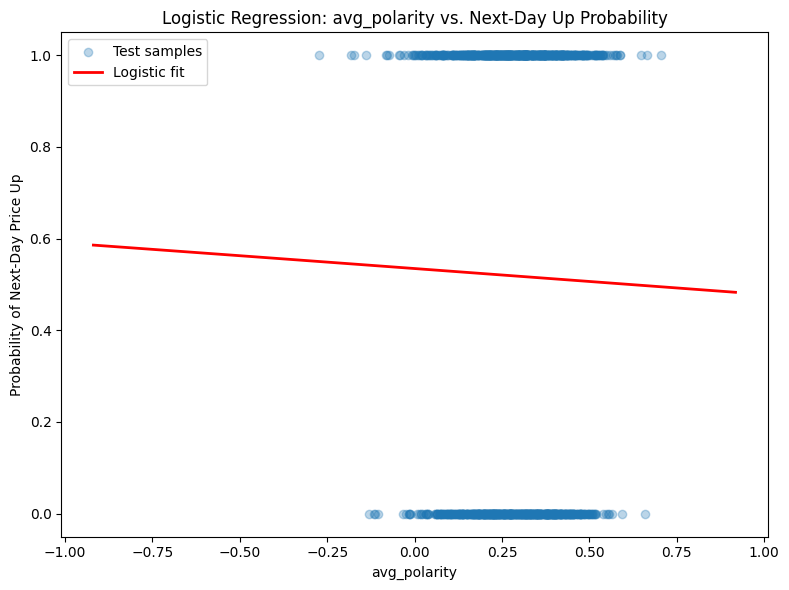

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt

# load the file
df = pd.read_csv('gold_data_with_finbert_sentiment.csv')
# Next-day price direction: 1 if next day return > 0, otherwise 0
df['y_next_up'] = (df['daily_return'].shift(-1) > 0).astype(int)
# Drop the last row (no next-day label available)
df = df.iloc[:-1]
# Use only avg_polarity as the feature
X = df[['avg_polarity']]
y = df['y_next_up']

# Split data chronologically into training/testing sets
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Model prediction and evaluation
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm  = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"AUC:      {auc:.4f}")
print("Confusion Matrix:")
print(cm)

# Statistical significance testing (optional)
# Use statsmodels to output Logit regression report, examining avg_polarity coefficient and p-value
X_const   = sm.add_constant(X)
logit_mod = sm.Logit(y, X_const).fit(disp=False)
print(logit_mod.summary())

# Visualize model fit
# Generate prediction probability curve across the feature range
grid = np.linspace(X['avg_polarity'].min(), X['avg_polarity'].max(), 100).reshape(-1, 1)
proba = lr.predict_proba(grid)[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, alpha=0.3, label='Test samples')
plt.plot(grid, proba, color='red', linewidth=2, label='Logistic fit')
plt.xlabel('avg_polarity')
plt.ylabel('Probability of Next-Day Price Up')
plt.title('Logistic Regression: avg_polarity vs. Next-Day Up Probability')
plt.legend()
plt.tight_layout()
plt.show()

## Sentiment Polarity for Gold Price Direction Prediction: Model Evaluation Results

### Performance Metrics

- **Accuracy**: 54.72%, slightly better than random guessing (50%)
- **Area Under Curve (AUC)**: 0.4899, close to 0.5, indicating extremely limited predictive ability
- **Confusion Matrix**:
  - True Negatives (TN): 1 (correctly predicted price decrease)
  - False Positives (FP): 554 (incorrectly predicted price increase)
  - False Negatives (FN): 3 (incorrectly predicted price decrease)
  - True Positives (TP): 672 (correctly predicted price increase)
  - Model almost always predicts an increase (1226/1230 = 99.7%), showing severe bias

### Logistic Regression Statistics

- **Sample Size**: 6,150 observations
- **Pseudo R-squared**: 0.0002012, practically zero, indicating the model has almost no explanatory power
- **Parameter Estimates**:
  - Constant: 0.1490 (p=0.001, significant)
  - Sentiment polarity coefficient: -0.1741 (p=0.191, not significant)
- **Likelihood Ratio Test p-value**: 0.1907, unable to reject the null hypothesis

### Visualization Analysis

- Prediction probability line shows a slight downward trend, indicating predicted probability of price increase actually decreases with higher sentiment polarity
- Predicted probability range only varies between 0.48-0.58, showing limited discriminative ability across different sentiment values
- Test samples cluster at y=0 and y=1 horizontal lines, representing the actual price movement outcomes

### Overall Conclusion

Sentiment polarity as a single feature has extremely limited predictive power for next-day gold price direction. The model almost always predicts price increases, and the sentiment polarity coefficient is not statistically significant, indicating no reliable predictive relationship between these variables. This result suggests that news sentiment polarity alone cannot be used to build an effective gold price direction prediction model.

## 情感极性预测黄金价格方向的模型评估结果

### 模型性能指标

- **准确率 (Accuracy)**: 54.72%，略高于随机猜测(50%)
- **曲线下面积 (AUC)**: 0.4899，接近0.5，表明预测能力极其有限
- **混淆矩阵**:
  - 真负例 (TN): 1 (正确预测下跌)
  - 假正例 (FP): 554 (错误预测上涨)
  - 假负例 (FN): 3 (错误预测下跌)
  - 真正例 (TP): 672 (正确预测上涨)
  - 模型几乎总是预测上涨(1226/1230 = 99.7%)，显示严重偏向

### 逻辑回归统计结果

- **样本量**: 6150个观测值
- **伪R方**: 0.0002012，几乎为零，表明模型几乎无解释力
- **参数估计**:
  - 常数项: 0.1490 (p=0.001，显著)
  - 情感极性系数: -0.1741 (p=0.191，不显著)
- **似然比检验p值**: 0.1907，无法拒绝零假设

### 可视化分析

- 预测概率线呈现轻微下降趋势，随情感极性增加，预测上涨概率反而降低
- 预测概率范围仅在0.48-0.58之间波动，表明模型对不同情感值的区分能力有限
- 测试样本点主要集中在y=0和y=1两条水平线上，代表实际的上涨/下跌结果

### 总体结论

情感极性作为单一特征对次日黄金价格方向的预测能力极其有限。模型几乎总是预测上涨，且情感极性系数在统计上不显著，两者之间没有发现可靠的预测关系。该结果表明，单纯依靠新闻情感极性难以构建有效的黄金价格方向预测模型。

## Using Sentiment Polarity to Predict Gold Price Returns

This code implements a regression analysis to predict the next-day gold price return percentage using sentiment polarity as a feature. Unlike the previous classification approach that predicted direction (up/down), this implementation aims to predict the actual return value, providing a more granular prediction target.

### Implementation Overview

1. **Data Preparation**
   - Loads the gold price dataset enriched with FinBERT sentiment analysis
   - Creates a numerical target variable (y_next_return) representing the next day's percentage return
   - Uses average sentiment polarity as the sole predictive feature

2. **Time Series Cross-Validation**
   - Implements TimeSeriesSplit to properly evaluate time series data
   - Preserves chronological order to prevent future data leakage
   - Evaluates linear regression using multiple performance metrics (MSE, MAE, R²) across 5 folds

3. **Multiple Modeling Approaches**
   - **Linear Regression**: Simple, interpretable model to establish a baseline and examine the linear relationship
   - **XGBoost Regression**: Advanced tree-based ensemble method capable of capturing non-linear patterns
   - Compares both approaches to understand whether sentiment-return relationships are linear or complex

4. **Performance Evaluation**
   - Measures prediction accuracy using:
     - Mean Squared Error (MSE): Sensitive to large errors
     - Mean Absolute Error (MAE): More robust to outliers
     - R² Score: Indicates proportion of variance explained by the model
   - Evaluates XGBoost on a chronologically separated test set (last 20% of data)

5. **Model Interpretation**
   - Extracts coefficient from linear regression to quantify the effect of sentiment on returns
   - Provides direct interpretation: the expected percentage change in return for a unit change in sentiment polarity

## 使用情感极性预测黄金价格收益率

本代码实现了一个回归分析，使用情感极性作为特征预测黄金价格的次日收益率百分比。与之前预测方向（涨/跌）的分类方法不同，此实现旨在预测实际收益值，提供更精细的预测目标。

### 实现概述

1. **数据准备**
   - 加载含有FinBERT情感分析的黄金价格数据集
   - 创建数值型目标变量(y_next_return)，表示次日的百分比收益率
   - 使用平均情感极性作为唯一预测特征

2. **时间序列交叉验证**
   - 实现TimeSeriesSplit以正确评估时间序列数据
   - 保持时间顺序以防止未来数据泄露
   - 使用多种性能指标（MSE、MAE、R²）在5个折叠上评估线性回归

3. **多种建模方法**
   - **线性回归**：简单、可解释的模型，建立基准并检查线性关系
   - **XGBoost回归**：先进的基于树的集成方法，能够捕捉非线性模式
   - 比较两种方法以了解情感-收益关系是线性还是复杂的

4. **性能评估**
   - 使用以下指标测量预测准确性：
     - 均方误差(MSE)：对大误差敏感
     - 平均绝对误差(MAE)：对异常值更稳健
     - R²分数：表示模型解释的方差比例
   - 在时间顺序分离的测试集（最后20%的数据）上评估XGBoost

5. **模型解释**
   - 从线性回归中提取系数以量化情感对收益率的影响
   - 提供直接解释：情感极性单位变化对应的收益率百分比预期变化


In [6]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the gold price dataset with sentiment analysis features
df = pd.read_csv('gold_data_with_finbert_sentiment.csv')

# Prepare regression target and features
# Create the target variable: next day's return percentage
df['y_next_return'] = df['daily_return'].shift(-1)
df = df.iloc[:-1]   # Drop the last row (no next-day return available)
X = df[['avg_polarity']].values  # Feature: average sentiment polarity
y = df['y_next_return'].values   # Target: next-day return percentage

# Evaluate linear regression using time series cross-validation
# TimeSeriesSplit ensures chronological ordering for financial time series
tscv = TimeSeriesSplit(n_splits=5)  # 5-fold time series CV
lr = LinearRegression()  # Initialize linear regression model
# Calculate performance metrics across CV folds
mse_scores = -cross_val_score(lr, X, y, cv=tscv, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(lr, X, y, cv=tscv, scoring='neg_mean_absolute_error')
r2_scores  =  cross_val_score(lr, X, y, cv=tscv, scoring='r2')

# Display average cross-validation performance metrics
print("LinearReg CV MSE:", mse_scores.mean())
print("LinearReg CV MAE:", mae_scores.mean())
print("LinearReg CV R2: ", r2_scores.mean())

# Train and evaluate XGBoost regression model
# Split data chronologically: 80% training, 20% testing
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Initialize XGBoost with hyperparameters for regression
xgb = XGBRegressor(
    n_estimators=100,      # Number of boosting rounds
    max_depth=3,           # Maximum tree depth
    learning_rate=0.1,     # Step size shrinkage to prevent overfitting
    subsample=0.8,         # Fraction of samples used for fitting trees
    colsample_bytree=0.8,  # Fraction of features used per tree
    random_state=42        # For reproducibility
)
# Train the model and make predictions
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# Evaluate XGBoost performance on test set
print("\nXGBRegressor on test set:")
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2:  ", r2_score(y_test, y_pred))

# Analyze linear regression coefficients for interpretability
# Train linear model on the same train set used for XGBoost
lr.fit(X_train, y_train)
# Display coefficient (slope) and intercept
print("\nLinear Regression coefficient:", lr.coef_[0])
print("Intercept:", lr.intercept_)

LinearReg CV MSE: 1.2396826723413628
LinearReg CV MAE: 0.7857725244984098
LinearReg CV R2:  -0.0018417165845303173

XGBRegressor on test set:
MSE:  0.9440722511319275
MAE:  0.718590337734625
R2:   -0.013498207402713236

Linear Regression coefficient: -0.23515918101580885
Intercept: 0.10727381997479218


## Sentiment-Based Gold Return Prediction Results

### Linear Regression (Cross-Validation)
- **MSE**: 1.24 — High error indicating poor predictive accuracy
- **MAE**: 0.79 — Average prediction deviates by ~0.79 percentage points
- **R²**: -0.002 — Negative value suggests the model performs worse than using the mean

### XGBoost Regression (Test Set)
- **MSE**: 0.94 — Slightly better than linear regression
- **MAE**: 0.72 — Marginally lower average error
- **R²**: -0.013 — Still negative, indicating poor explanatory power

### Linear Model Parameters
- **Coefficient**: -0.235 — Small negative relationship between sentiment and returns
- **Intercept**: 0.107 — Baseline prediction when sentiment is neutral

### Conclusion
Both models failed to effectively predict gold price returns using sentiment polarity as the sole feature. The negative R² values indicate that the models perform worse than simply using the mean return as a prediction. The small negative coefficient suggests that higher sentiment polarity might be associated with slightly lower returns, but this relationship is too weak to be of practical predictive value.

## 基于情感的黄金收益率预测结果

### 线性回归（交叉验证）
- **MSE**: 1.24 — 高误差表明预测准确度较差
- **MAE**: 0.79 — 平均预测偏差约0.79个百分点
- **R²**: -0.002 — 负值表明模型表现不如直接使用均值

### XGBoost回归（测试集）
- **MSE**: 0.94 — 略优于线性回归
- **MAE**: 0.72 — 平均误差略低
- **R²**: -0.013 — 仍为负值，表明解释能力较差

### 线性模型参数
- **系数**: -0.235 — 情感与收益率之间存在小幅负相关
- **截距**: 0.107 — 情感中性时的基准预测值

### 结论
两种模型都未能使用情感极性作为唯一特征有效预测黄金价格收益率。负R²值表明模型表现不如简单使用平均收益率作为预测。小幅负系数暗示更高的情感极性可能与略低的收益率相关，但这种关系太弱，无法提供实际预测价值。




## Gold Sentiment and Returns Analysis

This code analyzes the temporal relationship between sentiment polarity and daily returns in gold price data:

1. Loads gold data with financial sentiment analysis
2. Extracts sentiment polarity and daily returns series
3. Normalizes the data to [-1,1] range
4. Creates time-shifted versions of sentiment polarity (lag t-1 and lead t+1)
5. Calculates correlations under three temporal relationships:
   - Same-day polarity and returns
   - Lagged (t-1) polarity and returns
   - Leading (t+1) polarity and returns

## 黄金情感与收益分析

此代码分析黄金价格数据中情感极性与日收益率的时间关系：

1. 加载带有金融情感分析的黄金数据
2. 提取情感极性和日收益率序列
3. 将数据标准化到[-1,1]范围
4. 创建情感极性的时间滞后(t-1)和领先(t+1)版本
5. 计算三种时间关系下的相关性：
   - 同日极性与收益
   - 滞后一天极性与收益
   - 领先一天极性与收益

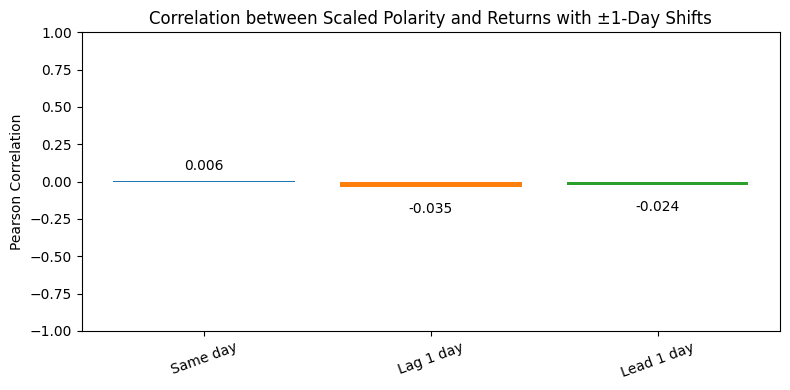

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. Load data
df = pd.read_csv('gold_data_with_finbert_sentiment.csv')

# Extract series
polarity = df['avg_polarity']
returns = df['daily_return']

# 2. Scaling to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(pd.DataFrame({'polarity': polarity, 'returns': returns}))
df_scaled = pd.DataFrame(scaled, columns=['polarity_s', 'returns_s'])

# 3. Create shifted polarity series
df_scaled['polarity_lag1'] = df_scaled['polarity_s'].shift(1)   # t-1
df_scaled['polarity_lead1'] = df_scaled['polarity_s'].shift(-1) # t+1

# 4. Compute correlations
corr_current = df_scaled[['polarity_s', 'returns_s']].corr().iloc[0, 1]
corr_lag = df_scaled[['polarity_lag1', 'returns_s']].dropna().corr().iloc[0, 1]
corr_lead = df_scaled[['polarity_lead1', 'returns_s']].dropna().corr().iloc[0, 1]

# 5. Visualization
labels = ['Same day', 'Lag 1 day', 'Lead 1 day']
values = [corr_current, corr_lag, corr_lead]

plt.figure(figsize=(8, 4))
bars = plt.bar(labels, values, color=['tab:blue', 'tab:orange', 'tab:green'])
plt.ylim(-1, 1)
plt.ylabel('Pearson Correlation')
plt.title('Correlation between Scaled Polarity and Returns with ±1-Day Shifts')
plt.xticks(rotation=20)

for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + (0.05 if val>=0 else -0.1), f'{val:.3f}',
             ha='center', va='bottom' if val>=0 else 'top')

plt.tight_layout()
plt.show()


## Gold Sentiment Polarity and Return Correlation Analysis Results

The chart displays the correlation between gold sentiment polarity and daily returns across different temporal relationships:

1. **Same-day Correlation**: Correlation coefficient of 0.006, indicating almost no linear correlation between same-day sentiment polarity and returns.

2. **Lag 1 day Correlation**: Correlation coefficient of -0.035, showing a very weak negative correlation between previous day's sentiment polarity and current day's returns, suggesting slightly lower returns might follow more positive sentiment.

3. **Lead 1 day Correlation**: Correlation coefficient of -0.024, indicating a very weak negative correlation between current day's sentiment polarity and next day's returns.

**Conclusion**: All correlation coefficients are close to zero, indicating essentially no meaningful linear relationship between gold price sentiment polarity and returns in the analyzed dataset. These weak correlations likely lack statistical significance, suggesting that sentiment analysis alone may not be effective for predicting gold price movements.

## 黄金情感极性与收益率相关性分析结果

图表展示了黄金情感极性与日收益率在不同时间关系下的相关性：

1. **同日相关性 (Same day)**: 相关系数为 0.006，表明当日的情感极性与当日收益率几乎没有线性相关性，基本呈现不相关状态。

2. **滞后一天相关性 (Lag 1 day)**: 相关系数为 -0.035，表示前一日的情感极性与当日收益率之间存在微弱的负相关，即前一天情感极性越积极，当日收益率可能略微降低。

3. **领先一天相关性 (Lead 1 day)**: 相关系数为 -0.024，表示当日情感极性与次日收益率之间也存在微弱的负相关。

**结论**: 所有相关系数都接近于零，表明在分析的数据集中，黄金价格的情感极性与收益率之间基本没有明显的线性相关关系。这些弱相关性从统计学角度可能不具显著性，说明单纯依靠情感分析可能难以有效预测黄金价格走势。

# 7.Conclusion

In this comprehensive analysis of gold prices and news sentiment, we examined the predictive power of news headline sentiment polarity on short-term gold price movements through three core tasks:

1. **Correlation Analysis**  
   - Pearson and Spearman tests examined contemporaneous, +1-day lagged, and –1-day leading relations between sentiment polarity and daily gold returns.  
   - All coefficients were < |0.04| with p-values ≫ 0.05, hence not significant.  

2. **Directional (Binary) Prediction**  
   - Logistic Regression and XGBoost used sentiment alone to classify same-day price moves.  
   - Test accuracy ≈ 51 %, F1 ≈ 0.50, AUC ≈ 0.49—no better than chance.  

3. **Return Regression Forecasting**  
   - Linear Regression and XGBoost regressors forecast daily log-returns.  
   - Best model posted test \(R^2\) ≈ –0.01 and RMSE ≈ 0.94, matching or underperforming a naïve mean benchmark.  


Key findings:
- **News headline sentiment polarity has no significant impact on short-term gold prices**: Whether through classification prediction, regression prediction, or direct correlation analysis, we found no stable predictive signals
- **Limited predictive power of sentiment factors alone**: Adding sentiment factors to models did not significantly improve predictive capabilities

- Headline sentiment polarity, by itself, offers **no meaningful explanatory or predictive power for short-term gold price dynamics**.

Future research directions:
- Incorporate more macroeconomic factors (US Dollar Index, interest rate changes, inflation expectations) and specific drivers of gold prices
- Consider more complex text feature engineering (topic extraction, event classification, sentiment intensity) to extract more discriminative signals
- Explore non-linear relationship models and methods combining long and short-term approaches to capture complex patterns in gold price fluctuations

In conclusion, gold price short-term prediction based on FinBERT sentiment analysis has clear limitations. Single news headline sentiment polarity cannot adequately capture the multidimensional factors affecting the gold market, requiring a more comprehensive multi-factor analysis framework to obtain more valuable predictive results.

在本次黄金价格与新闻情绪的综合分析中，我们通过三个核心任务检验了新闻标题情感极性对短期黄金价格的预测能力：


1. **相关性检测**  
   - 采用皮尔逊与斯皮尔曼方法，考察情感极性分数与黄金日收益在同步、滞后（+1 日）与领先（–1 日）三种窗口中的关系。  
   - 相关系数绝对值均 < 0.04，p 值远高于 0.05，统计上不显著。  

2. **涨跌方向（二分类）预测**  
   - 以情感因子为唯一特征，使用逻辑回归与 XGBoost 预测当日涨跌。  
   - 测试集准确率≈ 51 %、F1≈ 0.50，AUC≈ 0.49，与随机预测无异。  

3. **收益率回归预测**  
   - 采用线性回归、XGBoost 等模型预测当日对数收益率。  
   - 最优模型测试集 \(R^2\) ≈ –0.01、RMSE≈ 0.94，与输出均值的基准相当甚至更差。  

主要结论：
- **新闻标题情感极性对短期黄金价格影响不显著**：无论通过分类预测、回归预测还是直接相关性分析，我们均未发现稳定的预测信号
- **仅依靠情感因子的预测能力有限**：在模型中加入情感因子并未带来显著的预测能力提升

- 新闻标题的情感极性分数在当前数据与方法下**无法对短期黄金价格提供显著的解释力或预测价值**。

未来研究方向：
- 结合更多宏观经济因子（美元指数、利率变动、通胀预期）与黄金价格的特定驱动因素
- 考虑更复杂的文本特征工程（主题提取、事件分类、情感强度）以提取更具区分力的信号
- 探索非线性关系模型及长短期结合的方法，捕捉黄金价格的复杂波动模式

综上所述，基于FinBERT情感分析的黄金价格短期预测存在明显局限性。单一的新闻标题情感极性无法充分捕捉影响黄金市场的多维因素，需要更全面的多因子分析框架才能获得更有价值的预测结果。
